<a href="https://colab.research.google.com/github/Nobel712/Machine-Learning/blob/main/covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data1=pd.read_csv('/content/drive/MyDrive/ML DB/(2nd Times Edited Copy ) Side effects of post COVID-19 vacccination(English) (Responses) (1).csv')

In [ ]:
data=data1.iloc[:3762,:33]
#data=data1

In [ ]:
df1=data

In [ ]:
df1.head()

,Timestamp,Name,Age,Sex,Profession,Name of Vaccine Center,District,Name of vaccine,congenital disorders,Cardiac disease,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,11/3/2021 0:49:41,borun dey,65.0,1.0,business,Tala General Hospital,Satkhira,AstraZeneca,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11/3/2021 20:22:25,lotif dauyan,58.0,1.0,Retired,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11/3/2021 20:24:45,shojol chondra dhor,36.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11/3/2021 20:28:17,sukumar mondol,62.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11/3/2021 20:32:22,bidhan mondor,60.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df1.shape

(3762, 33)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 33 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Timestamp                               3680 non-null   object 
 1   Name                                    3762 non-null   object 
 2   Age                                     3762 non-null   int64  
 3   Sex                                     3762 non-null   int64  
 4   Profession                              3762 non-null   object 
 5   Name of Vaccine Center                  3762 non-null   object 
 6   District                                3762 non-null   object 
 7   Name of vaccine                         3762 non-null   object 
 8   congenital disorders                    3762 non-null   int64  
 9   Cardiac disease                         3762 non-null   int64  
 10  Tuberculosis                            3762 non-null   int6

In [ ]:
null=df1.isnull().sum()
null

Timestamp                                 82
Name                                       0
Age                                        0
Sex                                        0
Profession                                 0
Name of Vaccine Center                     0
District                                   0
Name of vaccine                            0
congenital disorders                       0
Cardiac disease                            0
Tuberculosis                               0
Fever                                      0
Gastroenteritis                            0
Diarrhoea                                  0
Hypertension                               1
Bleeding disorder                          0
Respiratory distress                       1
Thyroid                                    0
No side effect for first dose              0
Pain at injection site for first dose      4
Fever for first dose                       5
Muscle pain for first dose                 6
Generalize

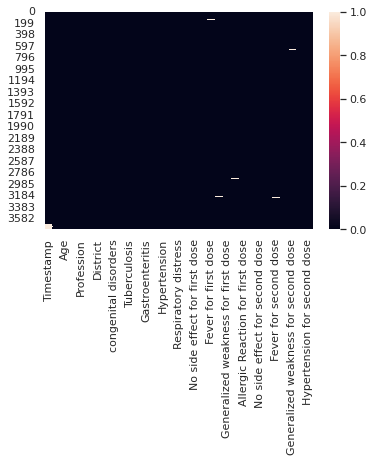

In [ ]:
sns.set()
sns.heatmap(df1.isnull())

In [ ]:
df2_num=df1.select_dtypes(include=['int64','float64'])
df2_num.isnull().sum()

Age                                       0
Sex                                       0
congenital disorders                      0
Cardiac disease                           0
Tuberculosis                              0
Fever                                     0
Gastroenteritis                           0
Diarrhoea                                 0
Hypertension                              1
Bleeding disorder                         0
Respiratory distress                      1
Thyroid                                   0
No side effect for first dose             0
Pain at injection site for first dose     4
Fever for first dose                      5
Muscle pain for first dose                6
Generalized weakness for first dose       7
Headache for first dose                   4
Allergic Reaction for first dose          9
Hypertension for first dose               6
No side effect for second dose            3
Pain at injection site for second dose    1
Fever for second dose           

In [ ]:
null_var=[var for var in df2_num.columns if df2_num[var].isnull().sum()>0]
null_var

['Hypertension',
 'Respiratory distress',
 'Pain at injection site for first dose',
 'Fever for first dose',
 'Muscle pain for first dose',
 'Generalized weakness for first dose',
 'Headache for first dose',
 'Allergic Reaction for first dose',
 'Hypertension for first dose',
 'No side effect for second dose',
 'Pain at injection site for second dose',
 'Fever for second dose',
 'Muscle pain for second dose',
 'Generalized weakness for second dose',
 'Headache for second dose',
 'Hypertension for second dose']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

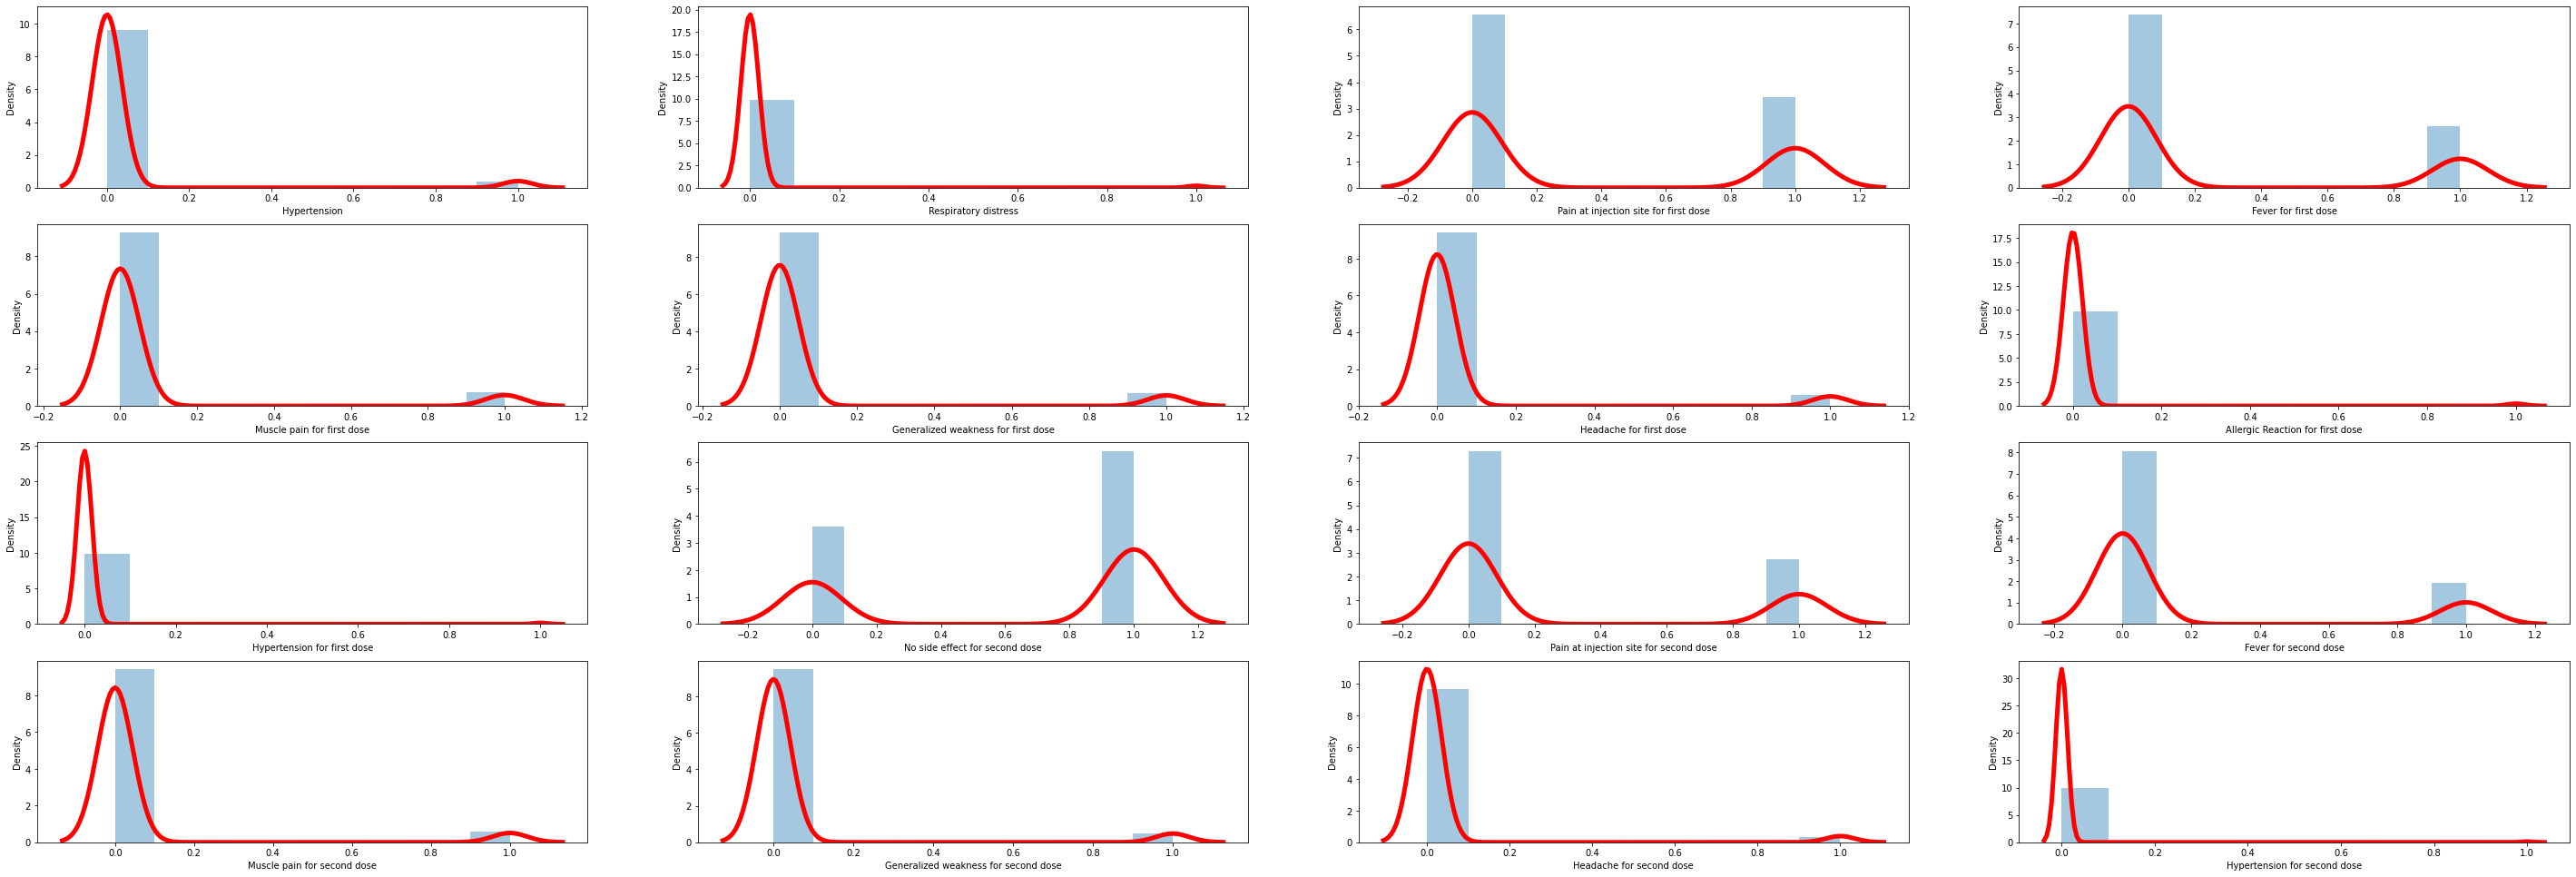

In [ ]:
plt.figure(figsize=(50,70))
for i,var in enumerate(null_var):
  plt.subplot(16,4,i+1)
  sns.distplot(df2_num[var],bins=10,kde_kws={"linewidth":5,"color":'r'})
plt.show()

In [ ]:
df3=df2_num.fillna(df2_num.mean())
df3.isnull().sum()

Age                                       0
Sex                                       0
congenital disorders                      0
Cardiac disease                           0
Tuberculosis                              0
Fever                                     0
Gastroenteritis                           0
Diarrhoea                                 0
Hypertension                              0
Bleeding disorder                         0
Respiratory distress                      0
Thyroid                                   0
No side effect for first dose             0
Pain at injection site for first dose     0
Fever for first dose                      0
Muscle pain for first dose                0
Generalized weakness for first dose       0
Headache for first dose                   0
Allergic Reaction for first dose          0
Hypertension for first dose               0
No side effect for second dose            0
Pain at injection site for second dose    0
Fever for second dose           

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

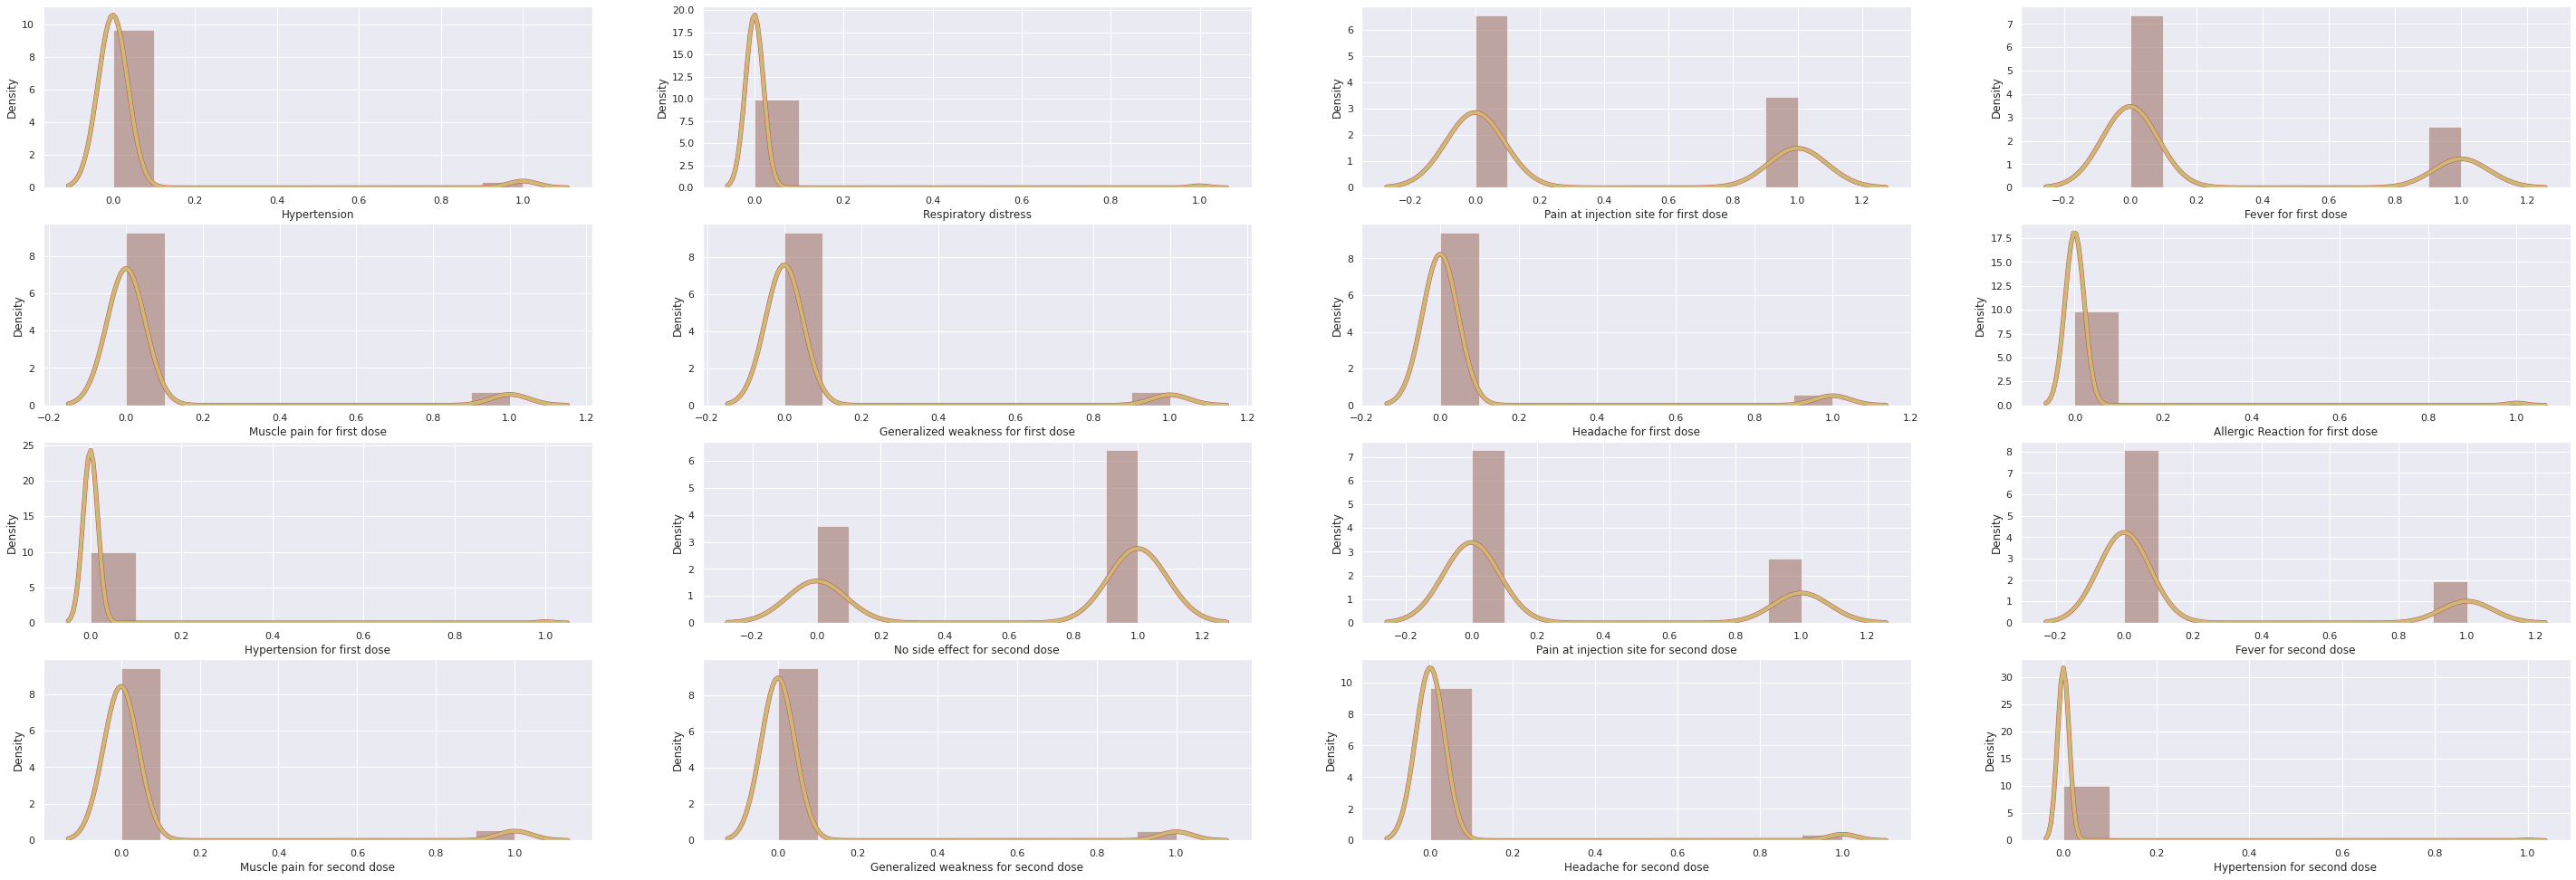

In [ ]:
plt.figure(figsize=(50,70))
for i,var in enumerate(null_var):
  plt.subplot(16,4,i+1)
  sns.distplot(df2_num[var],bins=10,kde_kws={'linewidth':5,'color':'r'})
  sns.distplot(df3[var],bins=10,kde_kws={'linewidth':4,"color":'y'})

In [ ]:
df5=df2_num.fillna(df2_num.median())
df5.isnull().sum()

Age                                       0
Sex                                       0
congenital disorders                      0
Cardiac disease                           0
Tuberculosis                              0
Fever                                     0
Gastroenteritis                           0
Diarrhoea                                 0
Hypertension                              0
Bleeding disorder                         0
Respiratory distress                      0
Thyroid                                   0
No side effect for first dose             0
Pain at injection site for first dose     0
Fever for first dose                      0
Muscle pain for first dose                0
Generalized weakness for first dose       0
Headache for first dose                   0
Allergic Reaction for first dose          0
Hypertension for first dose               0
No side effect for second dose            0
Pain at injection site for second dose    0
Fever for second dose           

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
`distplot` is a deprecated function and will

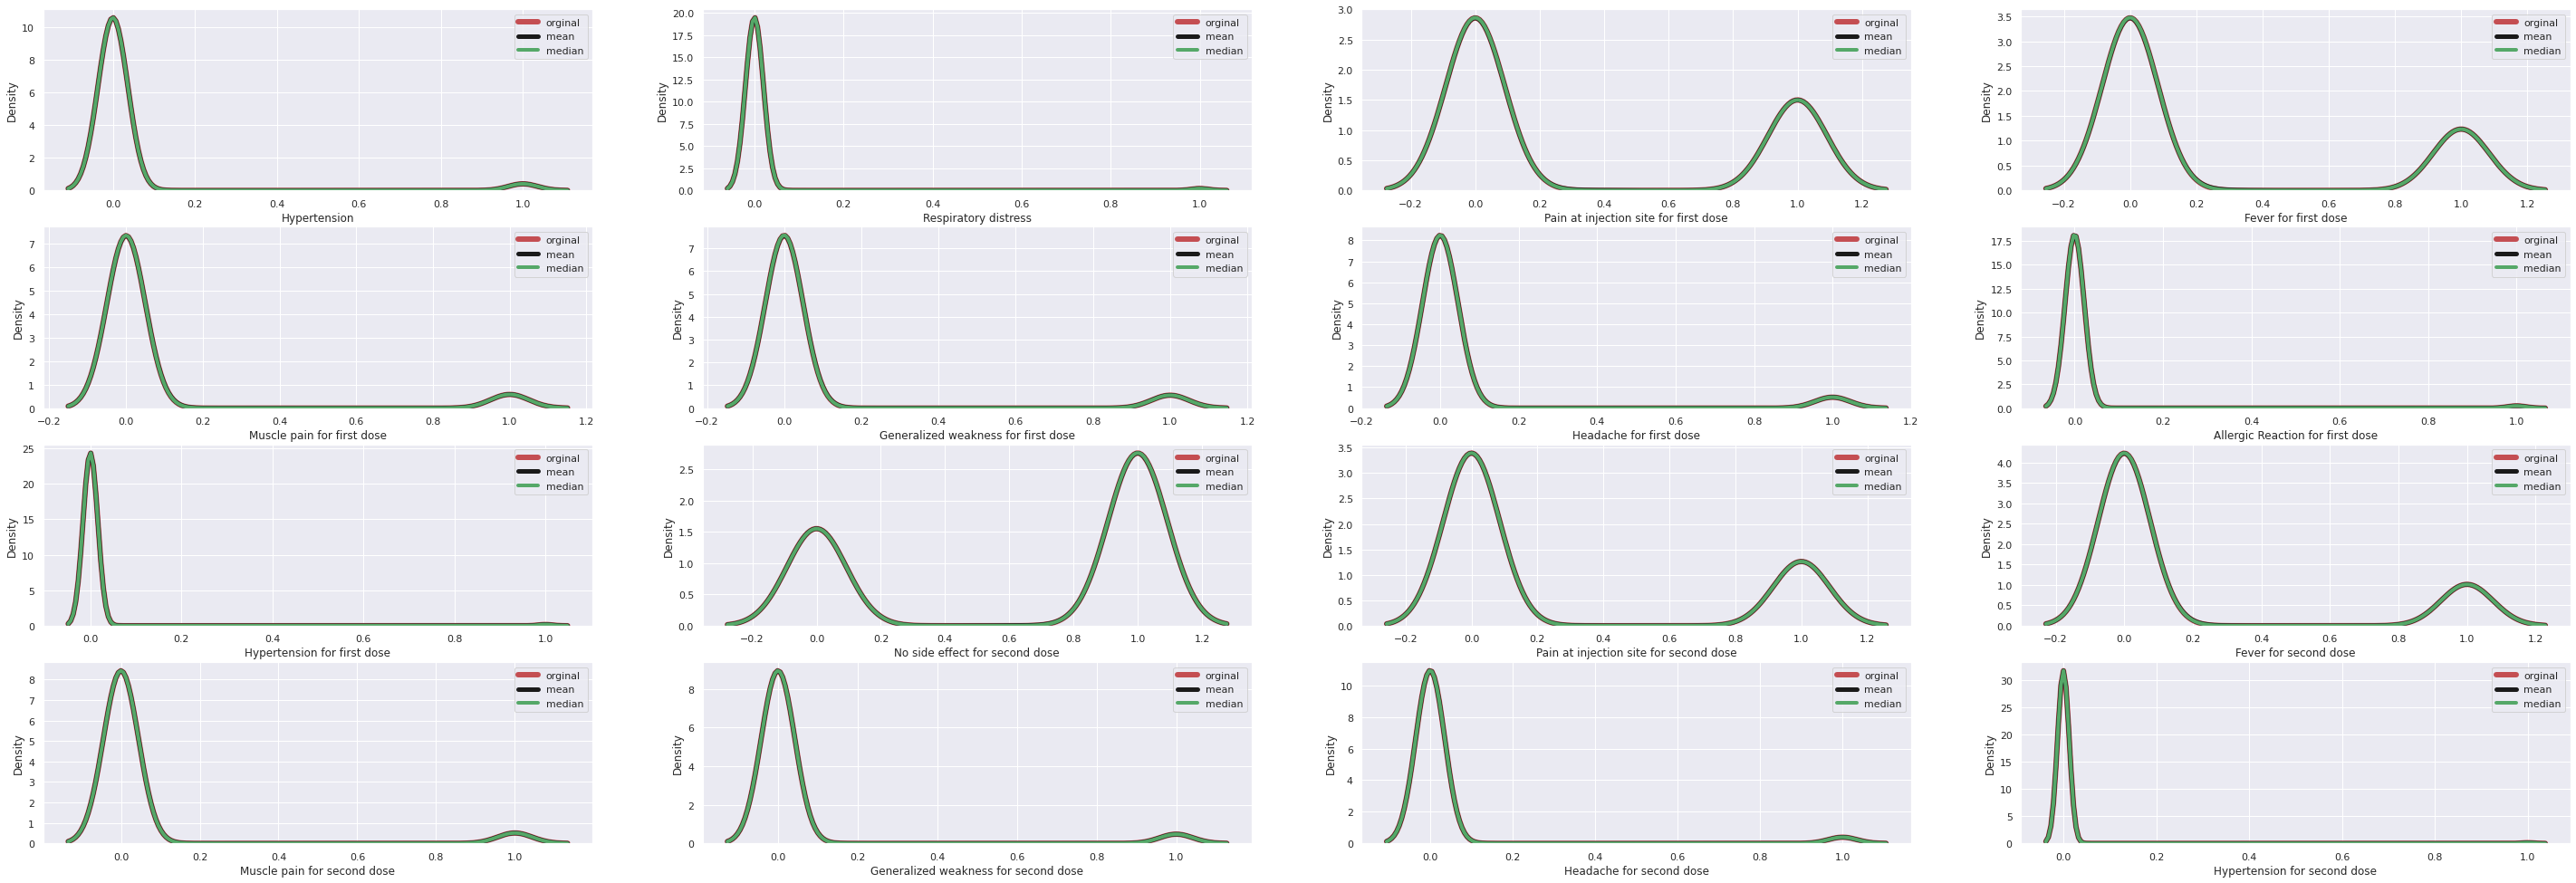

In [ ]:
plt.figure(figsize=(50,70))
sns.set()
for i,var in enumerate(null_var):
  plt.subplot(16,4,i+1)
  sns.distplot(df2_num[var],bins=10,hist=False,kde_kws={'linewidth':6,'color':'r'},label='orginal')
  sns.distplot(df3[var],bins=10,hist=False,kde_kws={'linewidth':5,"color":'k'},label='mean')
  sns.distplot(df5[var],bins=10,hist=False,kde_kws={'linewidth':4,"color":'g'},label='median')
  plt.legend()

In [ ]:
df5.head()

,Age,Sex,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,65,1,0,1,0,0,1,0,1.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58,1,0,0,0,0,0,0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,0,0,0,0,0.0,0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,62,1,0,0,0,0,0,0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60,1,0,0,0,0,0,0,0.0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df=df1.dropna()
df.shape

(3627, 33)

In [ ]:
df

,Timestamp,Name,Age,Sex,Profession,Name of Vaccine Center,District,Name of vaccine,congenital disorders,Cardiac disease,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,11/3/2021 0:49:41,borun dey,65.0,1.0,business,Tala General Hospital,Satkhira,AstraZeneca,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,11/3/2021 20:22:25,lotif dauyan,58.0,1.0,Retired,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,11/3/2021 20:24:45,shojol chondra dhor,36.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11/3/2021 20:28:17,sukumar mondol,62.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,11/3/2021 20:32:22,bidhan mondor,60.0,1.0,Worker,kaliakoir Health Complex,Gazipur,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,12/23/2021 20:47:35,runa bormon,22.0,0.0,Student,"Upazilla Health Complex,Shahrasti",Chandpur,Sinovac,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3676,12/23/2021 20:48:38,farhana hoque satu,32.0,0.0,Housewife,Dhaka Medical College,Dhaka,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3677,12/23/2021 20:50:21,farjana akter,20.0,0.0,Student,Dhaka Medical College,Dhaka,Vero Cell,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,12/23/2021 20:51:15,dulal ahamed,26.0,1.0,Job holder,Dhaka Medical College,Dhaka,Pfizer-BioNTech,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.describe()

,Age,Sex,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
count,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,...,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000,3627.000000
mean,41.324786,0.557761,0.002481,0.021230,0.001103,0.010201,0.038599,0.001930,0.032809,0.001379,...,0.057623,0.012131,0.006893,0.640750,0.268266,0.193824,0.057623,0.051006,0.034188,0.004411
std,15.438930,0.496721,0.049759,0.144169,0.033195,0.100499,0.192665,0.043895,0.178162,0.037108,...,0.233062,0.109487,0.082747,0.479847,0.443118,0.395347,0.233062,0.220041,0.181737,0.066281
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,40.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,96.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import plotly.graph_objects as go
x=df["Timestamp"]
y1 = df["congenital disorders"]
y2 = df["Cardiac disease"]
y3 = df["Tuberculosis"]
y4 = df["Fever"]
y5=df["Gastroenteritis"]
y6=df["Diarrhoea"]
y7=df["Hypertension"]
y8=df["Bleeding disorder"]
y9=df["Respiratory distress"]
y10=df["Thyroid"]


fig = go.Figure()


fig.add_trace(go.Scatter(x=x,
                    y = y1,
                    mode = "lines+markers",
                    name = "congenital disorders"
                    ))

fig.add_trace(go.Scatter(x=x,
                    y = y2,
                    mode = "lines+markers",
                    name = "Cardiac disease"
                    ))

fig.add_trace(go.Scatter(x=x,
                    y = y3,
                    mode = "lines+markers",
                    name = "Tuberculosis"
                    ))

fig.add_trace(go.Scatter(x=x,
                    y = y4,
                    mode = "lines+markers",
                    name = "Fever"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y5,
                    mode = "lines+markers",
                    name = "Gastroenteritis"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y6,
                    mode = "lines+markers",
                    name = "Diarrhoea"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y7,
                    mode = "lines+markers",
                    name = "Hypertension"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y8,
                    mode = "lines+markers",
                    name = "Bleeding disorder"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y9,
                    mode = "lines+markers",
                    name = "Respiratory distress"
                    ))
fig.add_trace(go.Scatter(x=x,
                    y = y10,
                    mode = "lines+markers",
                    name = "Thyroid"
                    ))


fig.update_layout(title = dict(text = "Line chart",
                              font_size = 20
                              ),
                 yaxis = dict(title = "Number of cases"),
                 xaxis = dict(title = "Timestamp"))

In [ ]:
df4=df.drop(['Timestamp','Name','Profession','Name of Vaccine Center','District','Name of vaccine'],axis=1)

In [ ]:
df4.head(5)

,Age,Sex,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,65.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
data['Name of vaccine']

0           AstraZeneca
1             Vero Cell
2             Vero Cell
3             Vero Cell
4             Vero Cell
             ...       
3757          vero Cell
3758            Sinovac
3759    Pfizer-BioNTech
3760          vero Cell
3761          vero Cell
Name: Name of vaccine, Length: 3762, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


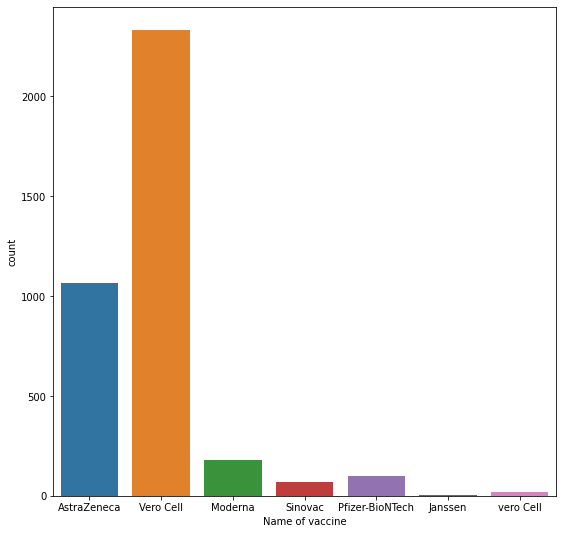

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(data['Name of vaccine'])
#plt.savefig('Nameofvaccine.png')

In [ ]:
data.drop(data.index[data['Name of vaccine'] == 'AstraZeneca'], inplace = True)
data.drop(data.index[data['Name of vaccine'] == 'vero Cell'], inplace = True)
data.drop(data.index[data['Name of vaccine'] == 'Janssen'], inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


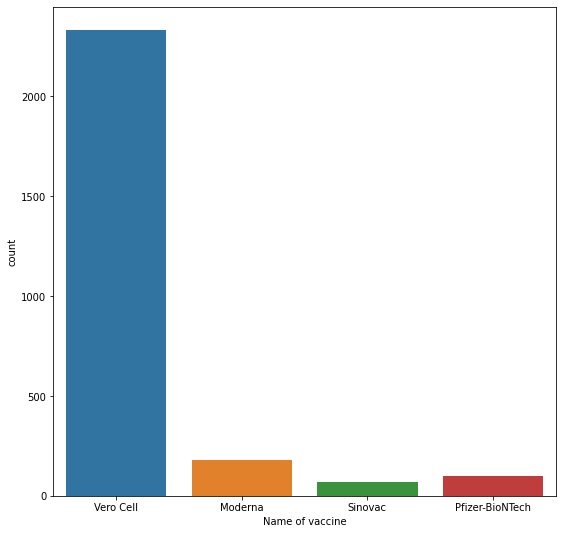

In [ ]:
plt.figure(figsize=(9,9))
sns.countplot(data['Name of vaccine'])
#plt.savefig('presentvaccinename')

In [ ]:
data['Name of vaccine'].value_counts()


Vero Cell          2333
Moderna             179
Pfizer-BioNTech      97
Sinovac              68
Name: Name of vaccine, dtype: int64

In [ ]:
classes =['Vero Cell','Moderna','Pfizer-BioNTech','Sinovac']
class1_student=[2333,179,97,68]

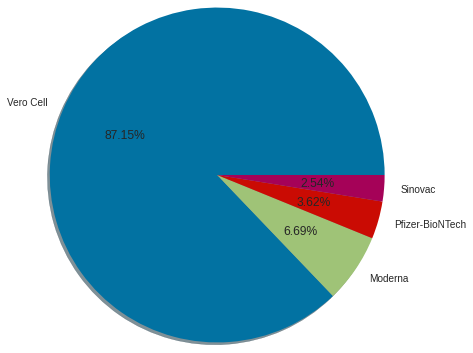

In [ ]:
expode=[0,0,0,0,0,0]
plt.pie(class1_student,labels=classes,autopct='%0.2f%%',shadow=True,radius=1.4)
#plt.savefig("presentpie.png")
plt.show()

In [ ]:
data['Name of vaccine'].shape

(2677,)

In [ ]:
y=data['Name of vaccine']
y

1             Vero Cell
2             Vero Cell
3             Vero Cell
4             Vero Cell
5             Vero Cell
             ...       
3739          Vero Cell
3740    Pfizer-BioNTech
3741          Vero Cell
3758            Sinovac
3759    Pfizer-BioNTech
Name: Name of vaccine, Length: 2677, dtype: object

In [ ]:
fg=y

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
y5=le.fit_transform(fg)

In [ ]:
f1=pd.DataFrame(y5, columns = ['Name of vaccine'])
f1

,Name of vaccine
0,3
1,3
2,3
3,3
4,3
...,...
2672,3
2673,1
2674,3
2675,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


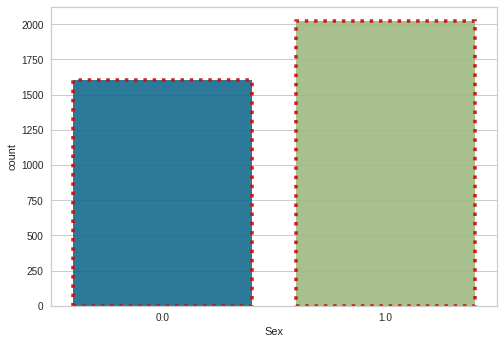

In [ ]:
sns.countplot(df['Sex'],edgecolor='r',linewidth=3.5,alpha=0.9,linestyle=':')
plt.savefig("sex.png")

Change DataFrame

In [ ]:
df2=df4
df2

,Age,Sex,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,...,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,No side effect for second dose,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
0,65.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,62.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,60.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3675,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3676,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3677,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3678,26.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df2.shape

(3627, 27)

In [ ]:
#y=y.sample(n=3627)
y.shape

(2677,)

In [ ]:
df2=df2.sample(n=2677)
df2.shape

(2677, 27)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(df2,y,test_size=.1,random_state=1000)

In [ ]:
model=SVC(gamma='scale')
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8805970149253731

In [ ]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8619402985074627

In [ ]:
tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=270)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

0.8694029850746269

Appropriate vaccine accuracy model

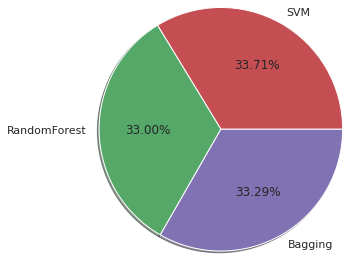

In [ ]:

classes =['SVM','RandomForest','Bagging']
class1_student=[0.8805,0.8619,0.8694]
color=['r','g','m']
plt.pie(class1_student,labels=classes,colors=color,autopct='%0.2f%%',shadow=True,radius=1.4,alhap)
#plt.savefig("presentpie.png")
plt.show()


In [ ]:
f_train=df2.iloc[:,12:20]
f_train

,No side effect for first dose,Pain at injection site for first dose,Fever for first dose,Muscle pain for first dose,Generalized weakness for first dose,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose
3324,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3629,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
90,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
1513,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3108,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
569,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - SClass Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

In [ ]:
fxtrain,fxtest,fytrain,fytest=train_test_split(f_train,y,test_size=.3,random_state=1000)
model=SVC()
model.fit(fxtrain,fytrain)
model.score(fxtest,fytest)

0.8718905472636815

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(fxtest)
cm = confusion_matrix(fytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(fytest,y_pred))

Confusion matrix: 
 [[  0   0   0  55]
 [  0   0   0  24]
 [  0   0   0  24]
 [  0   0   0 701]]
Classification report: 
                  precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        55
Pfizer-BioNTech       0.00      0.00      0.00        24
        Sinovac       0.00      0.00      0.00        24
      Vero Cell       0.87      1.00      0.93       701

       accuracy                           0.87       804
      macro avg       0.22      0.25      0.23       804
   weighted avg       0.76      0.87      0.81       804



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


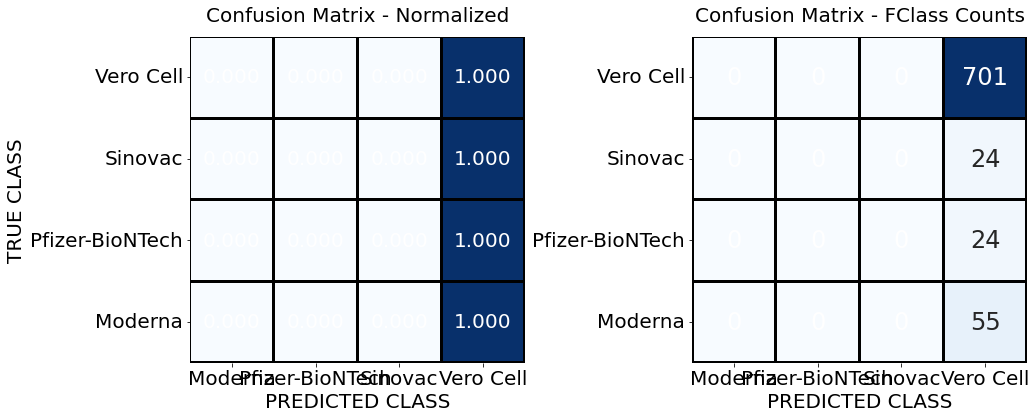

In [ ]:
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']
plot_confusion_matrix(confusion_matrix=cm, class_names=label, errors_only=False, fontsize=20)

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=1000)
rf_clf.fit(fxtrain, fytrain)
rf_clf.score(fxtest,fytest)

0.8706467661691543

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=270)
bagging_clf.fit(fxtrain, fytrain)
bagging_clf.score(fxtest,fytest)

0.8694029850746269

In [ ]:
y1=df2['No side effect for first dose']
y1

3324    0.0
3629    0.0
90      1.0
1952    1.0
2647    1.0
       ... 
1513    0.0
2772    0.0
3108    0.0
569     0.0
3549    0.0
Name: No side effect for first dose, Length: 2677, dtype: float64

In [ ]:
x1=pd.concat([f_train,f1],axis=1)

In [ ]:
x1.isnull().sum()

No side effect for first dose            736
Pain at injection site for first dose    736
Fever for first dose                     736
Muscle pain for first dose               736
Generalized weakness for first dose      736
Headache for first dose                  736
Allergic Reaction for first dose         736
Hypertension for first dose              736
Name of vaccine                          736
dtype: int64

In [ ]:
X=x1.dropna()
X

,No side effect for first dose,Pain at injection site for first dose,Fever for first dose,Muscle pain for first dose,Generalized weakness for first dose,Headache for first dose,Allergic Reaction for first dose,Hypertension for first dose,Name of vaccine
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...
2671,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,3.0
2673,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2674,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2675,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
y1=y1.sample(n=1941)
y1

1025    1.0
2984    1.0
1741    1.0
2908    0.0
2364    0.0
       ... 
311     0.0
1521    1.0
2184    1.0
116     1.0
2825    1.0
Name: No side effect for first dose, Length: 1941, dtype: float64

first

In [ ]:
x1train,x1test,y1train,y1test=train_test_split(X,y1,test_size=.1,random_state=1000)

svm first

In [ ]:
model=SVC()
model.fit(x1train,y1train)
model.score(x1test,y1test)

0.5743589743589743

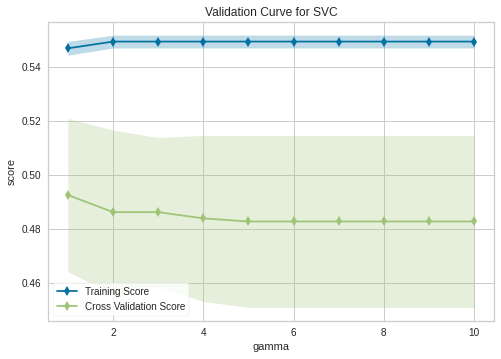

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(SVC(), x1train, y1train,
                                       param_name="gamma",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x1test)
cm = confusion_matrix(y1test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y1test,y_pred))

Confusion matrix: 
 [[  7  73]
 [ 10 105]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.41      0.09      0.14        80
         1.0       0.59      0.91      0.72       115

    accuracy                           0.57       195
   macro avg       0.50      0.50      0.43       195
weighted avg       0.52      0.57      0.48       195



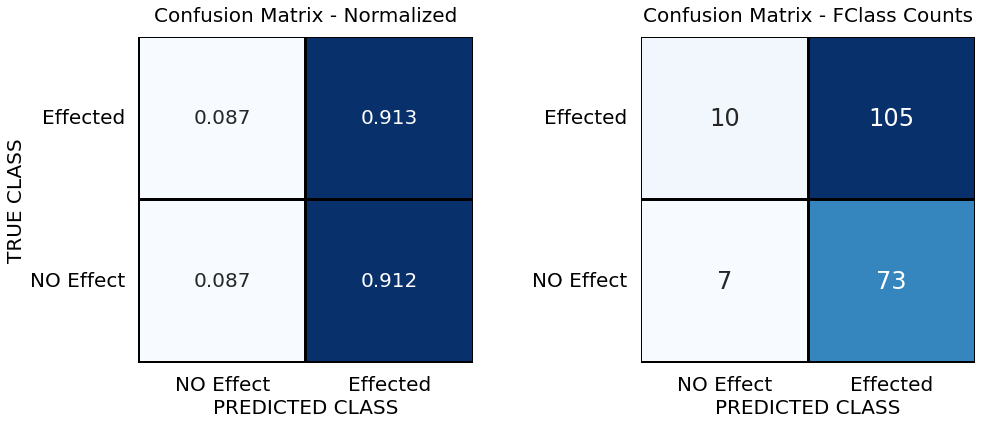

In [ ]:
label=['NO Effect','Effected']
plot_confusion_matrix(confusion_matrix=cm, class_names=label, errors_only=False, fontsize=20)
plt.savefig('ai3.png')

In [ ]:
from matplotlib import style
class1=['precision','recall','f1-score']
history=[ 0.41 ,0.09,0.14]
firstdos=[ 0.59 ,0.91 ,0.72]
class3_student=[ 0.50  ,0.50 ,0.43]
class4=[ 0.52,  0.57, 0.48  ]

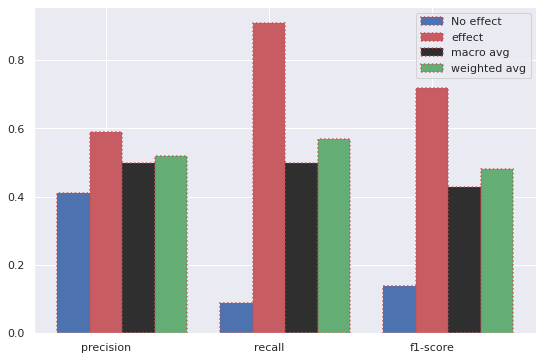

In [ ]:
sns.set()
plt.figure(figsize=(9,6))
class2=np.arange(len(class1))
width=0.2
plt.bar(class2,history,color='b',width=0.2,edgecolor='r',linewidth=1.5,alpha=1,linestyle=':',label='No effect')
plt.bar(class2+width,firstdos,color='r',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='effect')
plt.bar(class2+width+width,class3_student,color='k',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='macro avg')
plt.bar(class2+width+width+width,class4,color='g',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='weighted avg')
plt.xticks(class2+width,class1)
plt.legend()
plt.savefig('total.png')

randomforest first

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=100)
rf_clf.fit(x1train, y1train)
rf_clf.score(x1test,y1test)

0.5641025641025641

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x1test)
cm = confusion_matrix(y1test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y1test,y_pred))

Confusion matrix: 
 [[12 71]
 [13 99]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.48      0.14      0.22        83
         1.0       0.58      0.88      0.70       112

    accuracy                           0.57       195
   macro avg       0.53      0.51      0.46       195
weighted avg       0.54      0.57      0.50       195



Baggin frist

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=27)
bagging_clf.fit(x1train, y1train)
bagging_clf.score(x1test,y1test)

0.5692307692307692

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(x1test)
cm = confusion_matrix(y1test,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(y1test,y_pred))

Confusion matrix: 
 [[12 71]
 [13 99]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.48      0.14      0.22        83
         1.0       0.58      0.88      0.70       112

    accuracy                           0.57       195
   macro avg       0.53      0.51      0.46       195
weighted avg       0.54      0.57      0.50       195



In [ ]:
history=df2.iloc[:,:12]
history

,Age,Sex,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,Respiratory distress,Thyroid
3324,40.0,1.0,0.0,21.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
3629,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,72.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,45.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1513,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,23.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,70.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,28.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
history['congenital disorders']=history['congenital disorders'].replace(to_replace =1.0, value =2)
history['Cardiac disease']=history['Cardiac disease'].replace(to_replace =1.0, value =21)
history['Fever']=history['Tuberculosis']=history['Tuberculosis'].replace(to_replace =1.0, value =5)
history['Fever']=history['Fever'].replace(to_replace =1.0, value =4)
history['Diarrhoea']=history['Diarrhoea'].replace(to_replace =1.0, value =1.5)
history['Hypertension']=history['Hypertension'].replace(to_replace =1.0, value =2)
history['Bleeding disorder']=history['Bleeding disorder'].replace(to_replace =1.0, value =13)
history['Respiratory distress']=history['Respiratory distress'].replace(to_replace =1.0, value =1)
history['Thyroid']=history['Thyroid'].replace(to_replace =1.0, value =10)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
history

,congenital disorders,Cardiac disease,Tuberculosis,Fever,Gastroenteritis,Diarrhoea,Hypertension,Bleeding disorder,Respiratory distress,Thyroid
3324,0.0,21.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0
3629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1952,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
569,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
rr=pd.DataFrame(history)

In [ ]:
result=rr.sum(axis = 1, skipna = True)
result

3324    24.0
3629     0.0
90       0.0
1952     0.0
2647     0.0
        ... 
1513     0.0
2772     0.0
3108     0.0
569      0.0
3549     0.0
Length: 2677, dtype: float64

In [ ]:
X=pd.DataFrame(result, columns = ['input'])
X.shape

(2677, 1)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=.1,random_state=1000)

In [ ]:
model=SVC(gamma='auto',probability=True)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8805970149253731

In [ ]:
model.predict([[25]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


array(['Vero Cell'], dtype=object)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(history,y,test_size=.1,random_state=1000)

history svm

In [ ]:
model=SVC(gamma='auto',probability=True)
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.8805970149253731

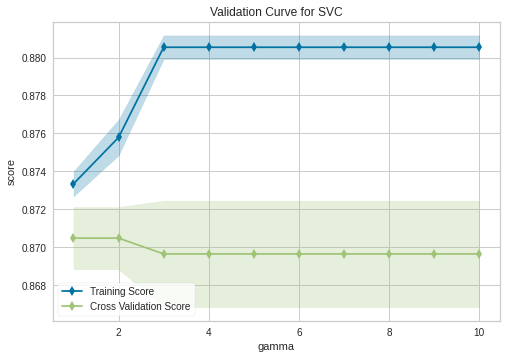

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(SVC(), xtrain, ytrain,
                                       param_name="gamma",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']

y_pred =model.predict(xtest)
cm = confusion_matrix(ytest,y_pred,labels=label)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
Classification report: 
                  precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        20
Pfizer-BioNTech       0.00      0.00      0.00         5
        Sinovac       0.00      0.00      0.00         7
      Vero Cell       0.88      1.00      0.94       236

       accuracy                           0.88       268
      macro avg       0.22      0.25      0.23       268
   weighted avg       0.78      0.88      0.82       268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
y_prob_pred_cnb =model.predict_proba(xtest)

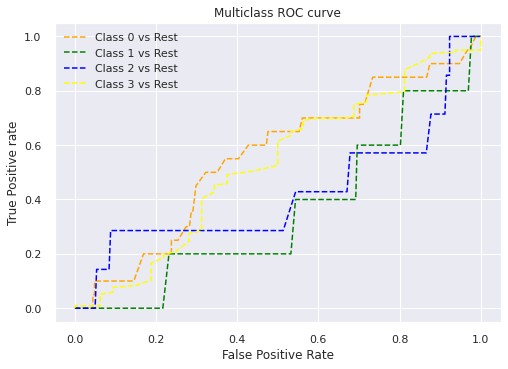

In [ ]:
fpr = {}
tpr = {}
thresh ={}

n_class = 4

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(ytest, y_prob_pred_cnb[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='yellow', label='Class 3 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 
plt.savefig('roc.png') 

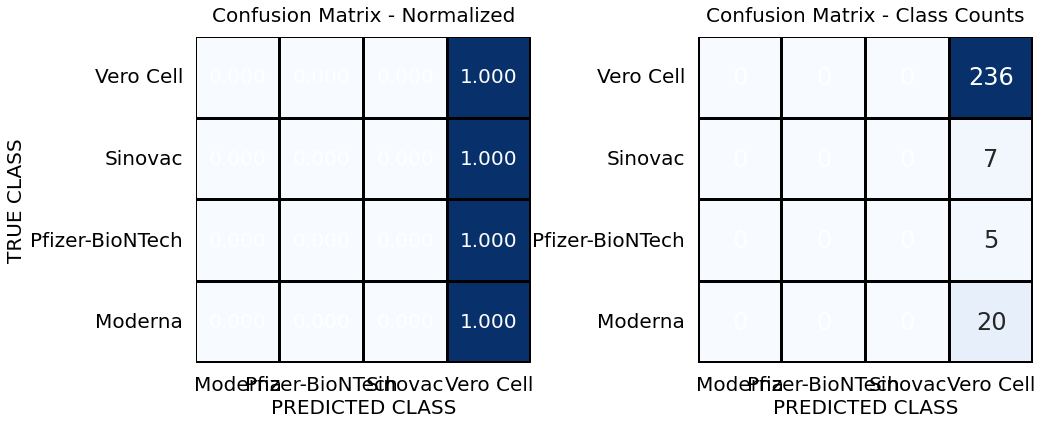

In [ ]:
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']
plot_confusion_matrix(confusion_matrix=cm, class_names=label, errors_only=False, fontsize=20)
plt.savefig('ai1.png')


In [ ]:
rf_clf = RandomForestClassifier( n_estimators=100)
rf_clf.fit(xtrain, ytrain)
rf_clf.score(xtest,ytest)

0.8694029850746269

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']

y_pred =rf_clf.predict(xtest)
cm = confusion_matrix(ytest,y_pred,labels=label)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  2   1   0 233]]
Classification report: 
                  precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        20
Pfizer-BioNTech       0.00      0.00      0.00         5
        Sinovac       0.00      0.00      0.00         7
      Vero Cell       0.88      0.99      0.93       236

       accuracy                           0.87       268
      macro avg       0.22      0.25      0.23       268
   weighted avg       0.77      0.87      0.82       268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=27)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

0.8768656716417911

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']

y_pred =bagging_clf.predict(xtest)
cm = confusion_matrix(ytest,y_pred,labels=label)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  1   0   0 235]]
Classification report: 
                  precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        20
Pfizer-BioNTech       0.00      0.00      0.00         5
        Sinovac       0.00      0.00      0.00         7
      Vero Cell       0.88      1.00      0.93       236

       accuracy                           0.88       268
      macro avg       0.22      0.25      0.23       268
   weighted avg       0.78      0.88      0.82       268



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
train=df2.iloc[:,21:]

In [ ]:
train

,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose
3324,1.0,1.0,1.0,0.0,0.0,0.0
3629,1.0,1.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.0,0.0,0.0,0.0
1952,0.0,0.0,0.0,0.0,0.0,0.0
2647,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
1513,0.0,0.0,0.0,0.0,0.0,0.0
2772,0.0,0.0,0.0,1.0,1.0,0.0
3108,0.0,1.0,0.0,0.0,0.0,0.0
569,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
fxtrain,fxtest,fytrain,fytest=train_test_split(train,y,test_size=.2,random_state=1000)
model=SVC()
model.fit(fxtrain,fytrain)
model.score(fxtest,fytest)

0.8638059701492538

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred = model.predict(fxtest)
cm = confusion_matrix(fytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(fytest,y_pred))

Confusion matrix: 
 [[  0   0   0  40]
 [  0   0   0  16]
 [  0   0   0  17]
 [  0   0   0 463]]
Classification report: 
                  precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        40
Pfizer-BioNTech       0.00      0.00      0.00        16
        Sinovac       0.00      0.00      0.00        17
      Vero Cell       0.86      1.00      0.93       463

       accuracy                           0.86       536
      macro avg       0.22      0.25      0.23       536
   weighted avg       0.75      0.86      0.80       536



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


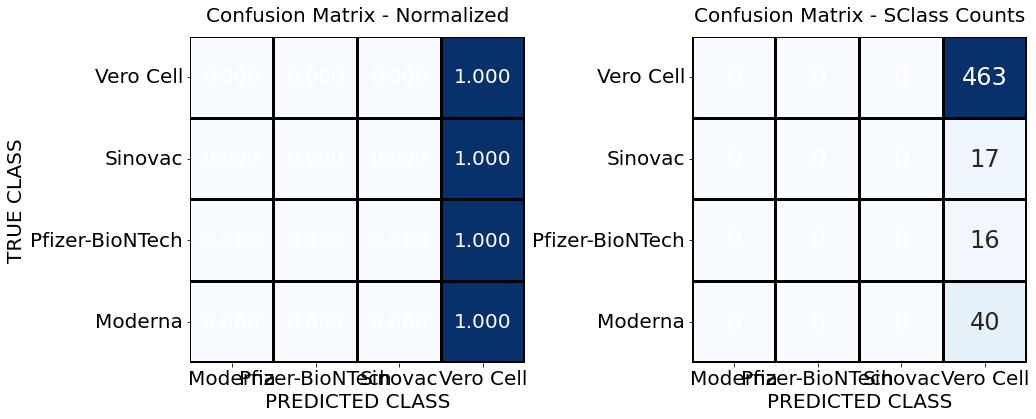

In [ ]:
label=['Moderna','Pfizer-BioNTech','Sinovac','Vero Cell']
plot_confusion_matrix(confusion_matrix=cm, class_names=label, errors_only=False, fontsize=20)

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=1000)
rf_clf.fit(fxtrain, fytrain)
rf_clf.score(fxtest,fytest)

0.8619402985074627

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=27)
bagging_clf.fit(fxtrain, fytrain)
bagging_clf.score(fxtest,fytest)

0.8600746268656716

In [ ]:
y2=df2['No side effect for second dose']
y2

3324    0.0
3629    0.0
90      1.0
1952    1.0
2647    1.0
       ... 
1513    1.0
2772    0.0
3108    0.0
569     0.0
3549    0.0
Name: No side effect for second dose, Length: 2677, dtype: float64

In [ ]:
x2=pd.concat([train,f1],axis=1)

In [ ]:
X=x2.dropna()
X

,Pain at injection site for second dose,Fever for second dose,Muscle pain for second dose,Generalized weakness for second dose,Headache for second dose,Hypertension for second dose,Name of vaccine
0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2,1.0,1.0,0.0,0.0,0.0,0.0,3.0
3,0.0,0.0,0.0,0.0,0.0,0.0,3.0
4,0.0,0.0,0.0,0.0,0.0,0.0,3.0
7,1.0,1.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...
2671,1.0,1.0,0.0,0.0,1.0,0.0,3.0
2673,1.0,1.0,1.0,1.0,0.0,0.0,1.0
2674,0.0,0.0,0.0,0.0,0.0,0.0,3.0
2675,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [ ]:
x=X.dropna()
x.isnull().sum()

Pain at injection site for second dose    0
Fever for second dose                     0
Muscle pain for second dose               0
Generalized weakness for second dose      0
Headache for second dose                  0
Hypertension for second dose              0
Name of vaccine                           0
dtype: int64

In [ ]:
x.shape

(1941, 7)

In [ ]:
y2=y2.sample(n=1941)


In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y2,test_size=.1,random_state=1000)

SVM sec

In [ ]:
model=SVC()
model.fit(xtrain,ytrain)
model.score(xtest,ytest)

0.6871794871794872

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred =model.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  0  61]
 [  0 134]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        61
         1.0       0.69      1.00      0.81       134

    accuracy                           0.69       195
   macro avg       0.34      0.50      0.41       195
weighted avg       0.47      0.69      0.56       195



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


randomforest sec

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=100)
rf_clf.fit(xtrain, ytrain)
rf_clf.score(xtest,ytest)

0.7025641025641025

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred =rf_clf.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  6 121]
 [ 11 251]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.35      0.05      0.08       127
         1.0       0.67      0.96      0.79       262

    accuracy                           0.66       389
   macro avg       0.51      0.50      0.44       389
weighted avg       0.57      0.66      0.56       389



In [ ]:
from matplotlib import style
class1=['precision','recall','f1-score']
history=[ 0.35,0.05,0.08]
firstdos=[ 0.67  ,0.96 ,0.79]

Bagging sec

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=27)
bagging_clf.fit(xtrain, ytrain)
bagging_clf.score(xtest,ytest)

0.7128205128205128

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred =bagging_clf.predict(xtest)
cm = confusion_matrix(ytest,y_pred)
print('Confusion matrix: \n',cm)
print('Classification report: \n',classification_report(ytest,y_pred))

Confusion matrix: 
 [[  1  54]
 [  2 138]]
Classification report: 
               precision    recall  f1-score   support

         0.0       0.33      0.02      0.03        55
         1.0       0.72      0.99      0.83       140

    accuracy                           0.71       195
   macro avg       0.53      0.50      0.43       195
weighted avg       0.61      0.71      0.61       195



In [ ]:
from matplotlib import style
class1=['precision','recall','f1-score']
history=[0.33 ,0.02,0.03]
firstdos=[ 0.72 ,0.99 ,0.83]
class3_student=[ 0.53 ,0.50 ,0.43]
class4=[ 0.61, 0.71,0.61 ]

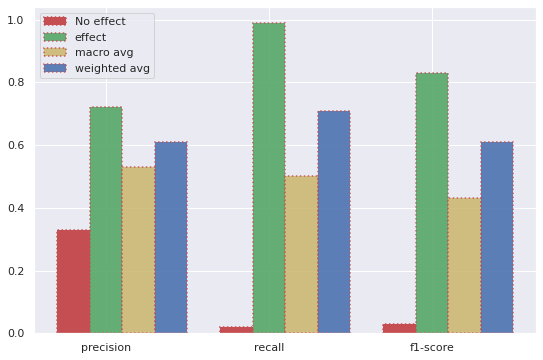

In [ ]:
sns.set()
plt.figure(figsize=(9,6))
class2=np.arange(len(class1))
width=0.2
plt.bar(class2,history,color='r',width=0.2,edgecolor='r',linewidth=1.5,alpha=1,linestyle=':',label='No effect')
plt.bar(class2+width,firstdos,color='g',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='effect')
plt.bar(class2+width+width,class3_student,color='y',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='macro avg')
plt.bar(class2+width+width+width,class4,color='b',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='weighted avg')
plt.xticks(class2+width,class1)
plt.legend()
plt.savefig('total.png')

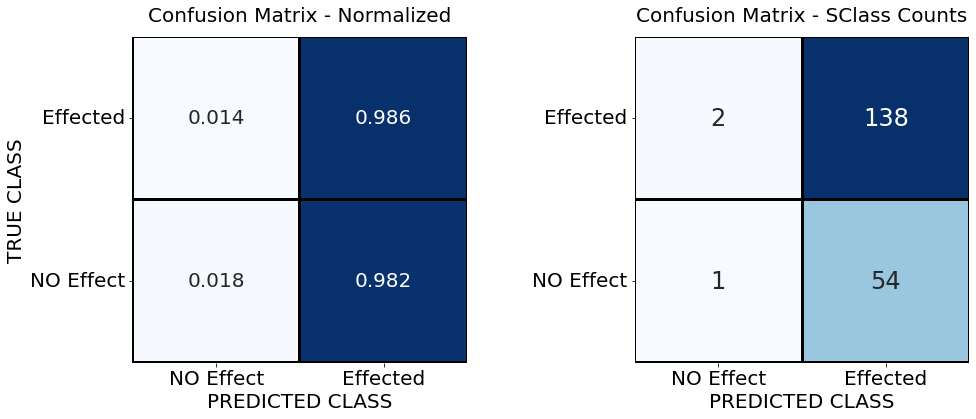

In [ ]:
label=['NO Effect','Effected']
plot_confusion_matrix(confusion_matrix=cm, class_names=label, errors_only=False, fontsize=20)
plt.savefig('ai2.png')

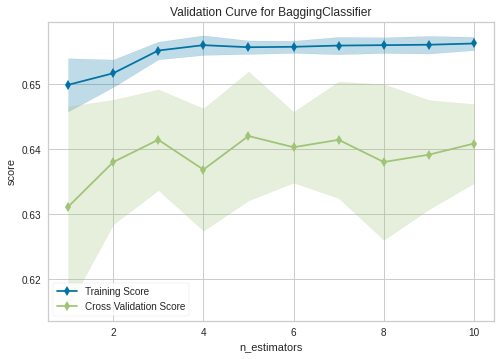

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(BaggingClassifier(base_estimator=tree, n_estimators=27), xtrain, ytrain,
                                       param_name="n_estimators",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
from matplotlib import style
class1=['SVM','RandomForestClassifier','Baggingclassifier']
history=[21.11,69.42,68.54]
firstdos=[59.97,58.71,58.57]
seconddos=[68.71,70.25,71.28]

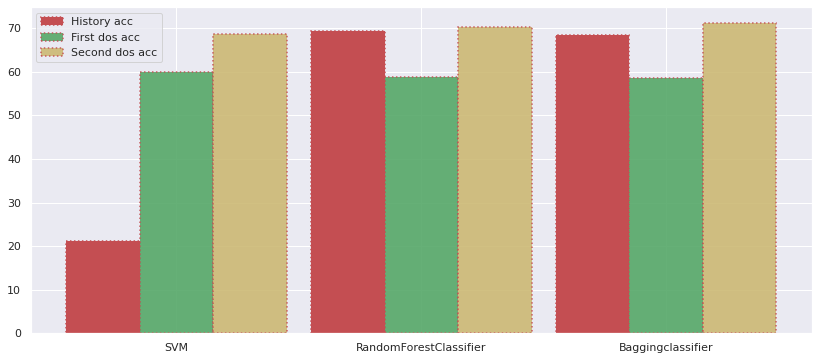

In [ ]:
sns.set()
plt.figure(figsize=(14,6))
class2=np.arange(len(class1))
width=0.3
plt.bar(class2,history,color='r',width=0.3,edgecolor='r',linewidth=1.5,alpha=1,linestyle=':',label='History acc')
plt.bar(class2+width,firstdos,color='g',width=0.3,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='First dos acc')
plt.bar(class2+width+width,seconddos,color='y',width=0.3,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='Second dos acc')
plt.xticks(class2+width,class1)
plt.legend()
plt.savefig('total.png')

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n****************************")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE OF TRAIN:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n**************************")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE OF TEST:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")
   

In [ ]:
fxtrain,fxtest,fytrain,fytest=train_test_split(f_train,y,test_size=.1,random_state=1000)

In [ ]:
Sxtrain,Sxtest,Sytrain,Sytest=train_test_split(sec_train,y,test_size=.1,random_state=1000)

Boosting Bagging

## SVM

In [ ]:
model = SVC(gamma='scale')
model.fit(fxtrain, fytrain)
evaluate(model, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   0    0    0  159]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8705
CLASSIFICATION REPORT:
           Moderna  Pfizer-BioNTech  Sinovac    Vero Cell  accuracy  \
precision      0.0              0.0      0.0     0.870486  0.870486   
recall         0.0              0.0      0.0     1.000000  0.870486   
f1-score       0.0              0.0      0.0     0.930759  0.870486   
support      159.0             92.0     61.0  2097.000000  0.870486   

             macro avg  weighted avg  
precision     0.217621      0.757745  
recall        0.250000      0.870486  
f1-score      0.232690      0.810212  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
           Moderna  Pfizer-BioNTech  Sinov

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
y_pred = model.predict(fxtest)
cf_matrix=confusion_matrix(fytest, y_pred)


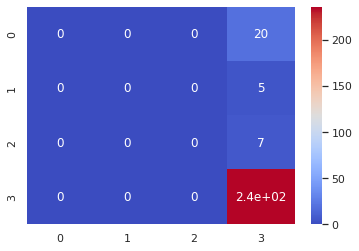

In [ ]:
sns.heatmap(cf_matrix, annot=True, cmap='coolwarm')
plt.savefig('ai.png')

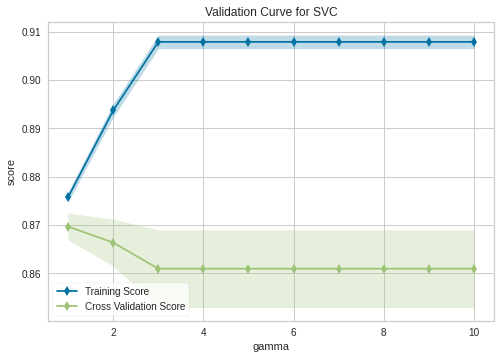

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(SVC(), fxtrain, fytrain,
                                       param_name="gamma",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
!pip install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
fxtest.shape

(268, 20)

In [ ]:
explainer = shap.Explainer(model.predict, fxtrain)
shap_values = explainer(fxtrain)

ValueError: ignored

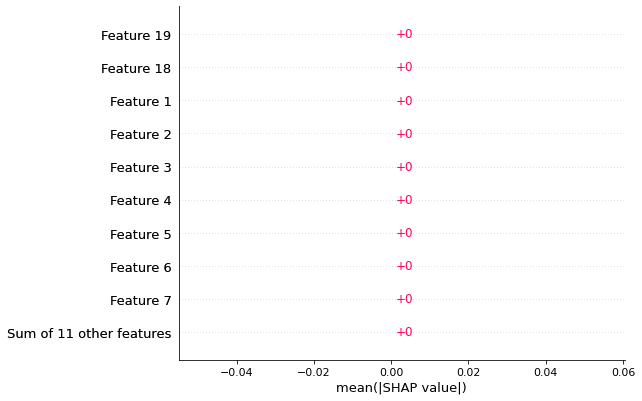

In [ ]:
shap.plots.bar(shap_values)

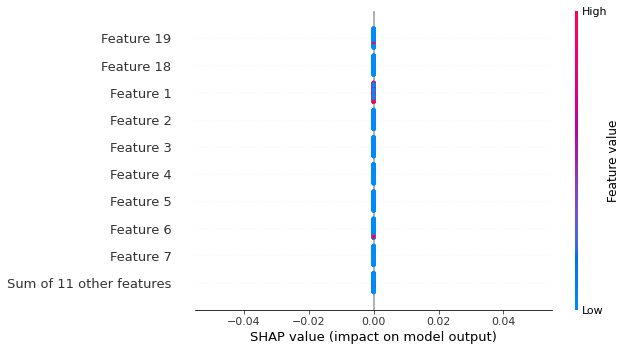

In [ ]:
shap.plots.beeswarm(shap_values)

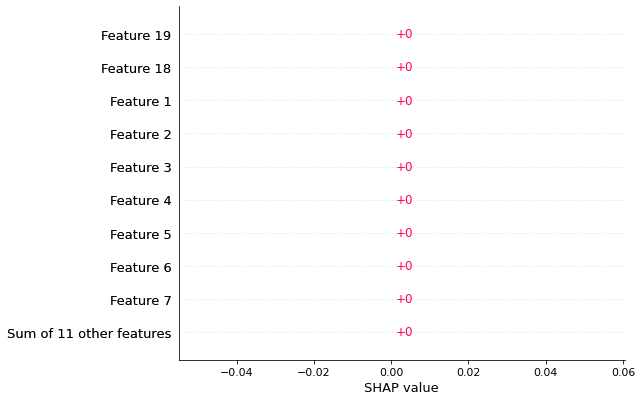

In [ ]:
shap.plots.bar(shap_values[0])

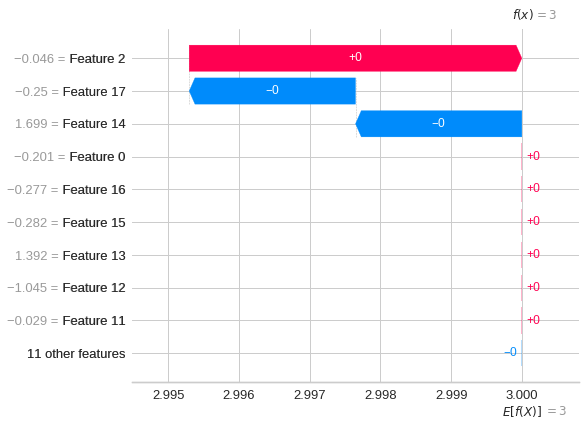

In [ ]:
shap.plots.waterfall(shap_values[0])

second

In [ ]:
model = SVC(gamma='scale')
model.fit(Sxtrain, Sytrain)
evaluate(model, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   0    0    0  159]
 [   0    0    0   92]
 [   0    0    1   60]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8709
CLASSIFICATION REPORT:
               0     1          2            3  accuracy    macro avg  \
precision    0.0   0.0   1.000000     0.870847  0.870901     0.467712   
recall       0.0   0.0   0.016393     1.000000  0.870901     0.254098   
f1-score     0.0   0.0   0.032258     0.930966  0.870901     0.240806   
support    159.0  92.0  61.000000  2097.000000  0.870901  2409.000000   

           weighted avg  
precision      0.783382  
recall         0.870901  
f1-score       0.811209  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
y_pred = model.predict(Sxtest)
cf_matrix=confusion_matrix(Sytest, y_pred)

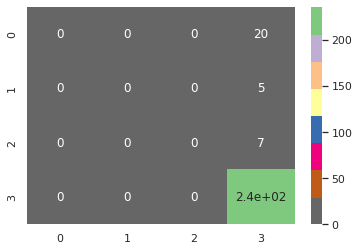

In [ ]:
sns.heatmap(cf_matrix, annot=True, cmap='Accent_r')
#plt.savefig('ai2.png')

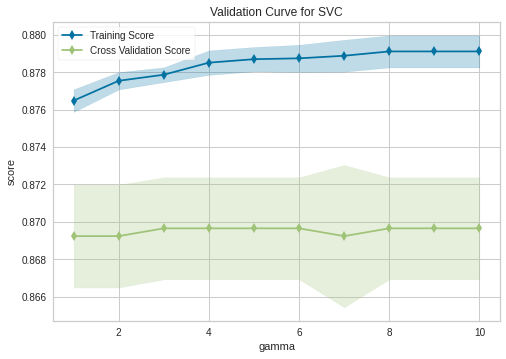

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(SVC(), Sxtrain, Sytrain,
                                       param_name="gamma",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")

In [ ]:
explainer = shap.Explainer(model.predict, Sxtest)
shap_values = explainer(Sxtest)

Permutation explainer: 269it [03:19,  1.28it/s]


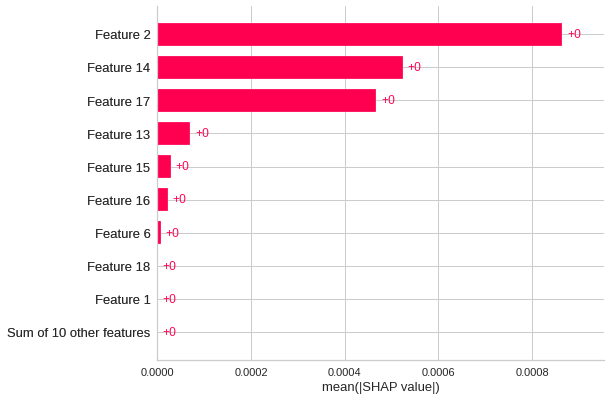

In [ ]:
shap.plots.bar(shap_values)

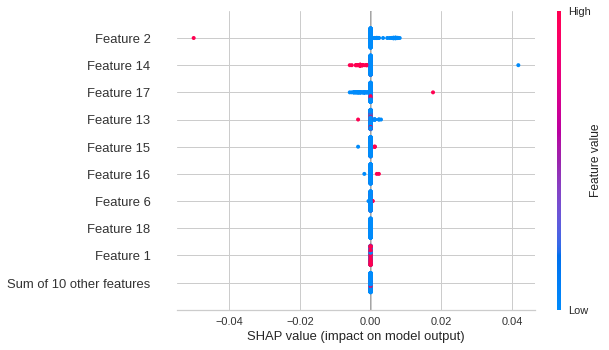

In [ ]:
shap.plots.beeswarm(shap_values)

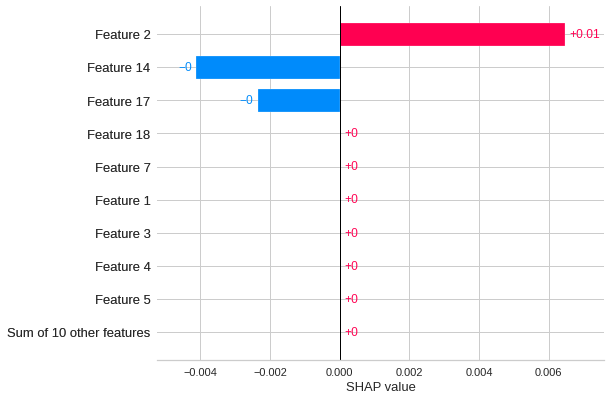

In [ ]:
shap.plots.bar(shap_values[0])

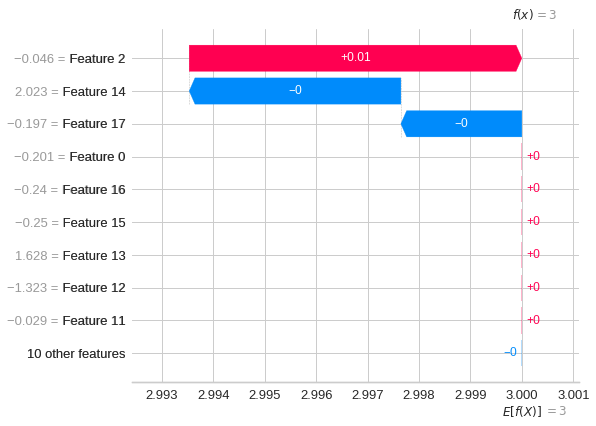

In [ ]:
shap.plots.waterfall(shap_values[0])

## RandomForestClassifier

first dos

In [ ]:
rf_clf = RandomForestClassifier( n_estimators=100)
rf_clf.fit(fxtrain, fytrain)
evaluate(rf_clf, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  49    0    0  110]
 [   0   22    0   70]
 [   0    0   17   44]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.9070
CLASSIFICATION REPORT:
              Moderna  Pfizer-BioNTech    Sinovac    Vero Cell  accuracy  \
precision    1.000000         1.000000   1.000000     0.903490  0.907015   
recall       0.308176         0.239130   0.278689     1.000000  0.907015   
f1-score     0.471154         0.385965   0.435897     0.949298  0.907015   
support    159.000000        92.000000  61.000000  2097.000000  0.907015   

             macro avg  weighted avg  
precision     0.975872      0.915989  
recall        0.456499      0.907015  
f1-score      0.560579      0.883226  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  2   0   0  18]
 [  0   0   0   5]
 [  0   0   0   7]
 [  3   2   1 230]]
ACCURACY SCORE OF TEST:
0.8657
CLASSIFICATION REPORT:
           Modern

In [ ]:
!pip install shap
import shap
explainer = shap.Explainer(rf_clf, fxtrain)
shap_values = explainer(fxtrain)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


 99%|===================| 9587/9636 [02:47<00:00]       

In [ ]:
shap.plots.bar(shap_values)

IndexError: ignored

In [ ]:
shap.plots.beeswarm(shap_values)
plt.savefig("randombeeswarm.png")

ValueError: ignored

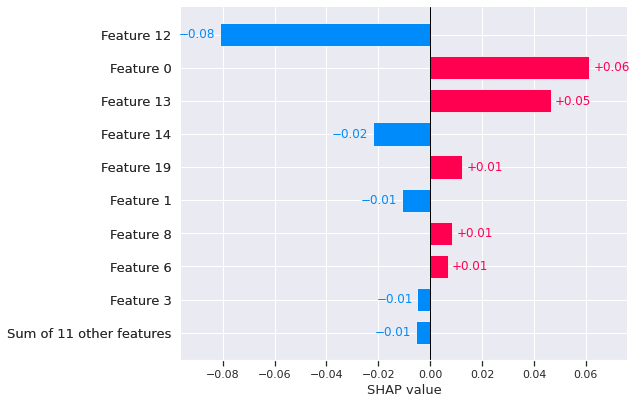

In [ ]:
shap.plots.bar(shap_values[0])

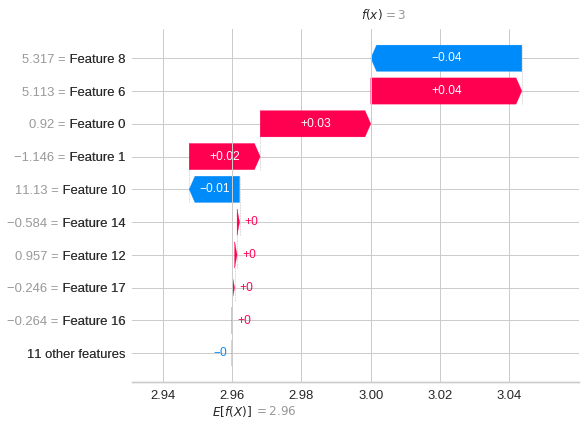

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.waterfall(shap_values[0])
plt.savefig("randomwater.png")

Second dos 

In [ ]:

rf_clf.fit(Sxtrain, Sytrain)
evaluate(rf_clf, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  30    0    1  128]
 [   1   17    0   74]
 [   0    0    9   52]
 [   1    0    1 2095]]
ACCURACY SCORE OF TRAIN:
0.8929
CLASSIFICATION REPORT:
                    0          1          2            3  accuracy  \
precision    0.937500   1.000000   0.818182     0.891869  0.892902   
recall       0.188679   0.184783   0.147541     0.999046  0.892902   
f1-score     0.314136   0.311927   0.250000     0.942420  0.892902   
support    159.000000  92.000000  61.000000  2097.000000  0.892902   

             macro avg  weighted avg  
precision     0.911888      0.897144  
recall        0.380012      0.892902  
f1-score      0.454621      0.859340  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   1   2 233]]
ACCURACY SCORE OF TEST:
0.8694
CLASSIFICATION REPORT:
              0    1    2           3  accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
explainer = shap.Explainer(rf_clf.predict, Sxtest)
shap_values = explainer(Sxtest)

Permutation explainer: 805it [08:25,  1.56it/s]


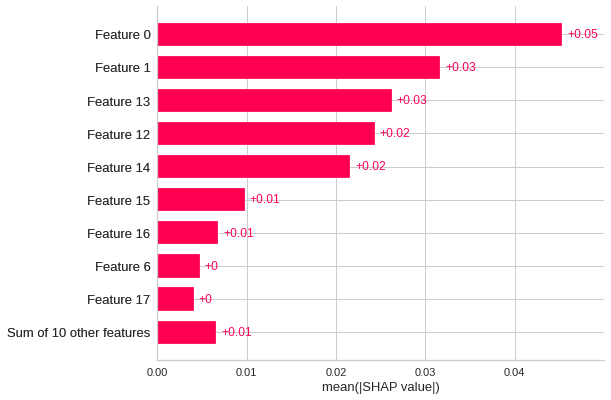

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.bar(shap_values)
plt.savefig("randombar2.png")

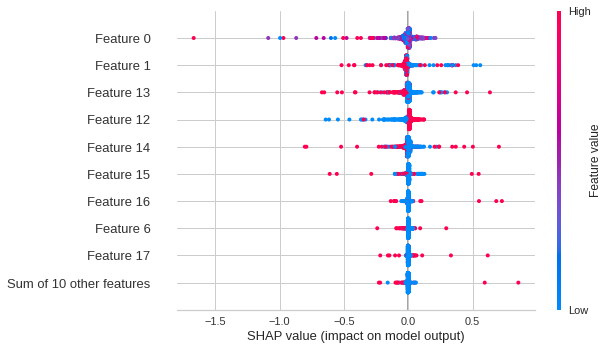

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.beeswarm(shap_values)
plt.savefig("randombeeswarm2.png")

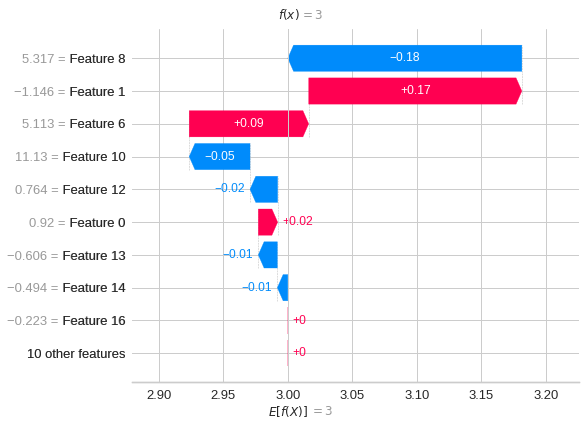

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.waterfall(shap_values[0])
plt.savefig("randomwaterfall2.png")

## DecisionTreeClassifier

first dos

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=27)
bagging_clf.fit(fxtrain, fytrain)

evaluate(bagging_clf, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  40    0    1  118]
 [   1   22    0   69]
 [   0    0   18   43]
 [   3    3    1 2090]]
ACCURACY SCORE OF TRAIN:
0.9008
CLASSIFICATION REPORT:
                    0          1          2            3  accuracy  \
precision    0.909091   0.880000   0.900000     0.900862  0.900789   
recall       0.251572   0.239130   0.295082     0.996662  0.900789   
f1-score     0.394089   0.376068   0.444444     0.946344  0.900789   
support    159.000000  92.000000  61.000000  2097.000000  0.900789   

             macro avg  weighted avg  
precision     0.897488      0.900587  
recall        0.445612      0.900789  
f1-score      0.540236      0.875406  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   1   0  19]
 [  0   0   0   5]
 [  0   0   0   7]
 [  1   3   0 232]]
ACCURACY SCORE OF TEST:
0.8657
CLASSIFICATION REPORT:
              0    1    2           3  accuracy

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


second dos

In [ ]:
bagging_clf.fit(Sxtrain, Sytrain)
evaluate(bagging_clf, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  30    1    0  128]
 [   0   18    0   74]
 [   2    0    5   54]
 [   2    0    0 2095]]
ACCURACY SCORE OF TRAIN:
0.8917
CLASSIFICATION REPORT:
                    0          1          2            3  accuracy  \
precision    0.882353   0.947368   1.000000     0.891110  0.891656   
recall       0.188679   0.195652   0.081967     0.999046  0.891656   
f1-score     0.310881   0.324324   0.151515     0.941996  0.891656   
support    159.000000  92.000000  61.000000  2097.000000  0.891656   

             macro avg  weighted avg  
precision     0.930208      0.895438  
recall        0.366336      0.891656  
f1-score      0.432179      0.856736  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   2   1 233]]
ACCURACY SCORE OF TEST:
0.8694
CLASSIFICATION REPORT:
              0    1    2           3  accuracy

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## ExtraTreeClassifier

first dos

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

ex_tree_clf = ExtraTreesClassifier(n_estimators=51, max_features=11)
ex_tree_clf.fit(fxtrain, fytrain)
evaluate(ex_tree_clf, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  54    0    0  105]
 [   1   23    0   68]
 [   1    1   16   43]
 [  13    6    3 2075]]
ACCURACY SCORE OF TRAIN:
0.9000
CLASSIFICATION REPORT:
                    0          1          2            3  accuracy  \
precision    0.782609   0.766667   0.842105     0.905718  0.899958   
recall       0.339623   0.250000   0.262295     0.989509  0.899958   
f1-score     0.473684   0.377049   0.400000     0.945761  0.899958   
support    159.000000  92.000000  61.000000  2097.000000  0.899958   

             macro avg  weighted avg  
precision     0.824275      0.890671  
recall        0.460357      0.899958  
f1-score      0.549124      0.879064  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  5   2   2 227]]
ACCURACY SCORE OF TEST:
0.8470
CLASSIFICATION REPORT:
              0    1    2           3  accuracy

second dos

In [ ]:
ex_tree_clf.fit(Sxtrain, Sytrain)
evaluate(ex_tree_clf, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[  40    0    0  119]
 [   2   20    0   70]
 [   2    0   13   46]
 [  10    3    5 2079]]
ACCURACY SCORE OF TRAIN:
0.8933
CLASSIFICATION REPORT:
                    0          1          2            3  accuracy  \
precision    0.740741   0.869565   0.722222     0.898444  0.893317   
recall       0.251572   0.217391   0.213115     0.991416  0.893317   
f1-score     0.375587   0.347826   0.329114     0.942643  0.893317   
support    159.000000  92.000000  61.000000  2097.000000  0.893317   

             macro avg  weighted avg  
precision     0.807743      0.882470  
recall        0.418374      0.893317  
f1-score      0.498793      0.866964  
support    2409.000000   2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  1   3   2 230]]
ACCURACY SCORE OF TEST:
0.8582
CLASSIFICATION REPORT:
              0    1    2           3  accuracy

## GradientBoostingClassifier

first dos

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost_clf = GradientBoostingClassifier(n_estimators=10 )
grad_boost_clf.fit(fxtrain, fytrain)
evaluate(grad_boost_clf, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   1    0    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8709
CLASSIFICATION REPORT:
                    0     1     2            3  accuracy    macro avg  \
precision    1.000000   0.0   0.0     0.870847  0.870901     0.467712   
recall       0.006289   0.0   0.0     1.000000  0.870901     0.251572   
f1-score     0.012500   0.0   0.0     0.930966  0.870901     0.235866   
support    159.000000  92.0  61.0  2097.000000  0.870901  2409.000000   

           weighted avg  
precision      0.824062  
recall         0.870901  
f1-score       0.811217  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   1   0 235]]
ACCURACY SCORE OF TEST:
0.8769
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

second dos

In [ ]:
grad_boost_clf.fit(Sxtrain, Sytrain)
evaluate(grad_boost_clf, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   1    0    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8709
CLASSIFICATION REPORT:
                    0     1     2            3  accuracy    macro avg  \
precision    1.000000   0.0   0.0     0.870847  0.870901     0.467712   
recall       0.006289   0.0   0.0     1.000000  0.870901     0.251572   
f1-score     0.012500   0.0   0.0     0.930966  0.870901     0.235866   
support    159.000000  92.0  61.0  2097.000000  0.870901  2409.000000   

           weighted avg  
precision      0.824062  
recall         0.870901  
f1-score       0.811217  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   1   0 235]]
ACCURACY SCORE OF TEST:
0.8769
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## AdaBoostClassifier

first dos

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(fxtrain, fytrain)
evaluate(ada_boost_clf, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   1    0    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8709
CLASSIFICATION REPORT:
                    0     1     2            3  accuracy    macro avg  \
precision    1.000000   0.0   0.0     0.870847  0.870901     0.467712   
recall       0.006289   0.0   0.0     1.000000  0.870901     0.251572   
f1-score     0.012500   0.0   0.0     0.930966  0.870901     0.235866   
support    159.000000  92.0  61.0  2097.000000  0.870901  2409.000000   

           weighted avg  
precision      0.824062  
recall         0.870901  
f1-score       0.811217  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

second dos

In [ ]:
ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(Sxtrain, Sytrain)
evaluate(ada_boost_clf, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   1    0    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8709
CLASSIFICATION REPORT:
                    0     1     2            3  accuracy    macro avg  \
precision    1.000000   0.0   0.0     0.870847  0.870901     0.467712   
recall       0.006289   0.0   0.0     1.000000  0.870901     0.251572   
f1-score     0.012500   0.0   0.0     0.930966  0.870901     0.235866   
support    159.000000  92.0  61.0  2097.000000  0.870901  2409.000000   

           weighted avg  
precision      0.824062  
recall         0.870901  
f1-score       0.811217  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## VotingClassifier

first dos

In [ ]:
from sklearn.ensemble import VotingClassifier
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(fxtrain, fytrain)

evaluate(voting, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   4    0    0  155]
 [   0    2    0   90]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8730
CLASSIFICATION REPORT:
                    0          1     2            3  accuracy    macro avg  \
precision    1.000000   1.000000   0.0     0.872659  0.872976     0.718165   
recall       0.025157   0.021739   0.0     1.000000  0.872976     0.261724   
f1-score     0.049080   0.042553   0.0     0.932000  0.872976     0.255908   
support    159.000000  92.000000  61.0  2097.000000  0.872976  2409.000000   

           weighted avg  
precision      0.863830  
recall         0.872976  
f1-score       0.816157  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted av

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
from yellowbrick.model_selection import validation_curve

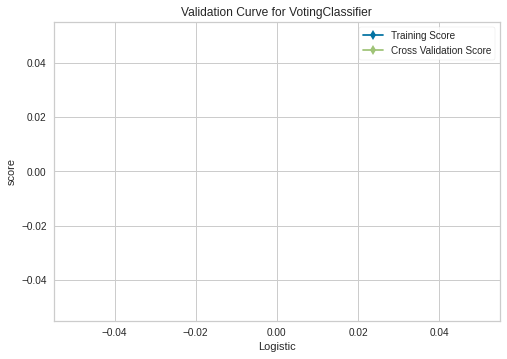

In [ ]:
viz = validation_curve(VotingClassifier(estimators=estimators), fxtrain, fytrain,
                                       param_name = "Logistic",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")
#plt.savefig('VotingAUC.png')

In [ ]:
explainer = shap.Explainer(voting.predict, fxtest)
shap_values = explainer(fxtest)

Permutation explainer: 805it [12:56,  1.02it/s]


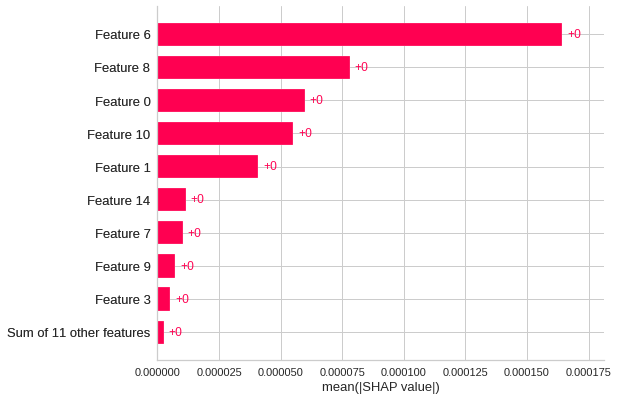

In [ ]:
shap.plots.bar(shap_values)

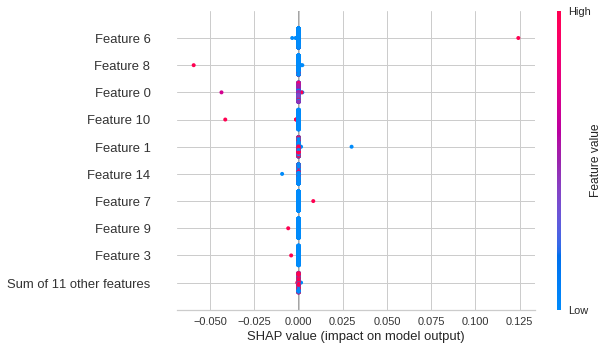

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.beeswarm(shap_values)
plt.savefig("votingbeeswarm.png")

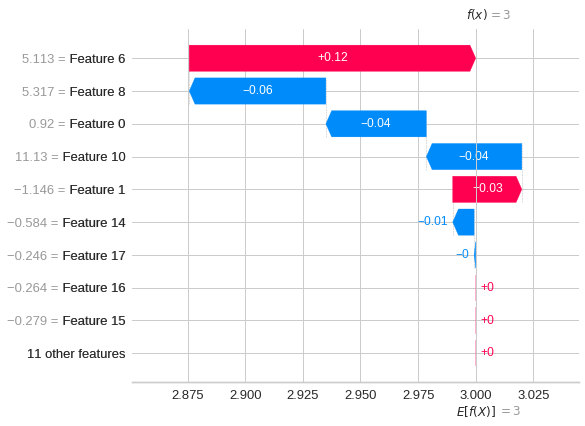

<Figure size 576x396 with 0 Axes>

In [ ]:
shap.plots.waterfall(shap_values[0])
plt.savefig("votingwater.png")

second dos

In [ ]:
estimators = []
log_reg = LogisticRegression(solver='liblinear')
estimators.append(('Logistic', log_reg))

tree = DecisionTreeClassifier()
estimators.append(('Tree', tree))

svm_clf = SVC(gamma='scale')
estimators.append(('SVM', svm_clf))

voting = VotingClassifier(estimators=estimators)
voting.fit(Sxtrain, Sytrain)

evaluate(voting, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   5    0    0  154]
 [   0    2    0   90]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8734
CLASSIFICATION REPORT:
                    0          1     2            3  accuracy    macro avg  \
precision    1.000000   1.000000   0.0     0.873022  0.873391     0.718256   
recall       0.031447   0.021739   0.0     1.000000  0.873391     0.263296   
f1-score     0.060976   0.042553   0.0     0.932207  0.873391     0.258934   
support    159.000000  92.000000  61.0  2097.000000  0.873391  2409.000000   

           weighted avg  
precision      0.864146  
recall         0.873391  
f1-score       0.817123  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted av

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


## Navie Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model=GaussianNB()

In [ ]:
model.fit(fxtrain,fytrain)

GaussianNB()

In [ ]:
model.score(fxtest,fytest)

0.043532338308457715

In [ ]:
from sklearn.naive_bayes import BernoulliNB


In [ ]:
model =BernoulliNB()
model.fit(fxtrain, fytrain)
evaluate(model, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   1    0    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    3    0 2094]]
ACCURACY SCORE OF TRAIN:
0.8697
CLASSIFICATION REPORT:
                    0     1     2            3  accuracy    macro avg  \
precision    1.000000   0.0   0.0     0.870686  0.869655     0.467672   
recall       0.006289   0.0   0.0     0.998569  0.869655     0.251215   
f1-score     0.012500   0.0   0.0     0.930253  0.869655     0.235688   
support    159.000000  92.0  61.0  2097.000000  0.869655  2409.000000   

           weighted avg  
precision      0.823922  
recall         0.869655  
f1-score       0.810597  
support     2409.000000  
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   1   1 234]]
ACCURACY SCORE OF TEST:
0.8731
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
model =BernoulliNB()
model.fit(Sxtrain, Sytrain)
evaluate(model, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   0    1    0  158]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    3    0 2094]]
ACCURACY SCORE OF TRAIN:
0.8692
CLASSIFICATION REPORT:
               0     1     2            3  accuracy    macro avg  weighted avg
precision    0.0   0.0   0.0     0.870686   0.86924     0.217672      0.757920
recall       0.0   0.0   0.0     0.998569   0.86924     0.249642      0.869240
f1-score     0.0   0.0   0.0     0.930253   0.86924     0.232563      0.809772
support    159.0  92.0  61.0  2097.000000   0.86924  2409.000000   2409.000000
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   1   0 235]]
ACCURACY SCORE OF TEST:
0.8769
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0.0    0.880150  0.876866    0.220037      0.775057
recall      0.0  0.0  0.0    0.995763  0.876866   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=41)
classifier.fit(fxtrain, fytrain)
evaluate(classifier, fxtrain, fxtest, fytrain, fytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   0    0    0  159]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8705
CLASSIFICATION REPORT:
               0     1     2            3  accuracy    macro avg  weighted avg
precision    0.0   0.0   0.0     0.870486  0.870486     0.217621      0.757745
recall       0.0   0.0   0.0     1.000000  0.870486     0.250000      0.870486
f1-score     0.0   0.0   0.0     0.930759  0.870486     0.232690      0.810212
support    159.0  92.0  61.0  2097.000000  0.870486  2409.000000   2409.000000
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0.0    0.880597  0.880597    0.220149      0.775451
recall      0.0  0.0  0.0    1.000000  0.880597   

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


In [ ]:
!pip install shap
import shap
explainer = shap.Explainer(classifier.predict, fxtest)
shap_values = explainer(fxtest)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Permutation explainer: 269it [05:12,  1.20s/it]


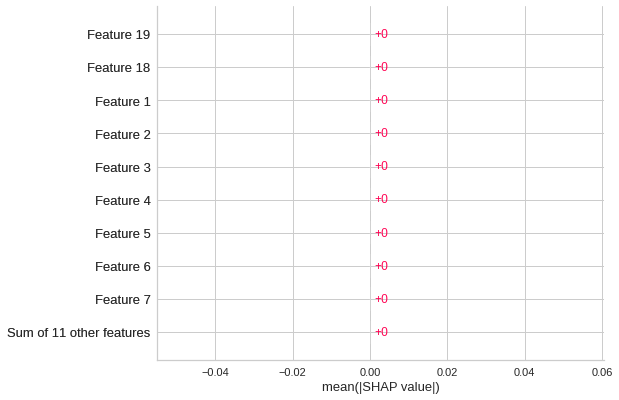

In [ ]:
shap.plots.bar(shap_values)
#plt.savefig("KNNbar.png")

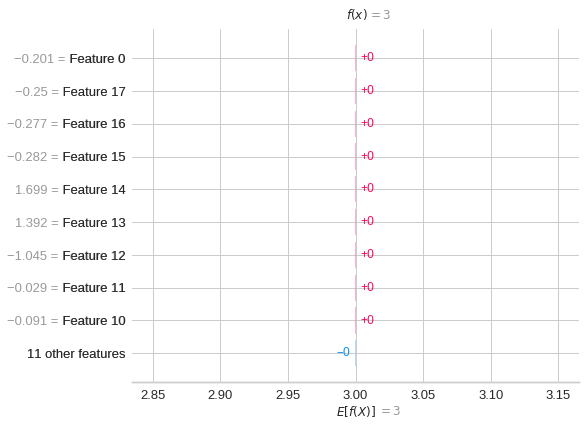

In [ ]:
shap.plots.waterfall(shap_values[0])

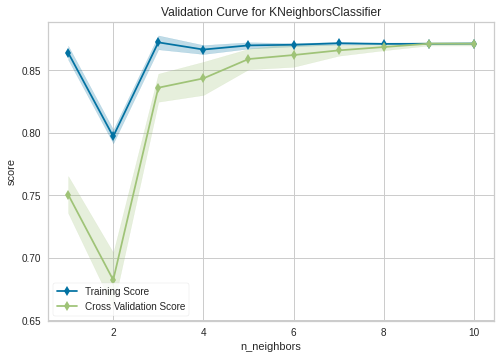

<Figure size 576x396 with 0 Axes>

In [ ]:
from yellowbrick.model_selection import validation_curve
viz = validation_curve(KNeighborsClassifier(41), fxtrain, fytrain,
                                       param_name = "n_neighbors",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")
#plt.savefig('AUC.png')

In [ ]:
classifier.fit(Sxtrain, Sytrain)
evaluate(classifier, Sxtrain, Sxtest, Sytrain, Sytest)

TRAINIG RESULTS: 
****************************
CONFUSION MATRIX:
[[   0    0    0  159]
 [   0    0    0   92]
 [   0    0    0   61]
 [   0    0    0 2097]]
ACCURACY SCORE OF TRAIN:
0.8705
CLASSIFICATION REPORT:
               0     1     2            3  accuracy    macro avg  weighted avg
precision    0.0   0.0   0.0     0.870486  0.870486     0.217621      0.757745
recall       0.0   0.0   0.0     1.000000  0.870486     0.250000      0.870486
f1-score     0.0   0.0   0.0     0.930759  0.870486     0.232690      0.810212
support    159.0  92.0  61.0  2097.000000  0.870486  2409.000000   2409.000000
TESTING RESULTS: 
**************************
CONFUSION MATRIX:
[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]
ACCURACY SCORE OF TEST:
0.8806
CLASSIFICATION REPORT:
              0    1    2           3  accuracy   macro avg  weighted avg
precision   0.0  0.0  0.0    0.880597  0.880597    0.220149      0.775451
recall      0.0  0.0  0.0    1.000000  0.880597   

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

In [ ]:
explainer = shap.Explainer(classifier.predict, Sxtest)
shap_values = explainer(Sxtest)

Permutation explainer: 805it [15:31,  1.17s/it]


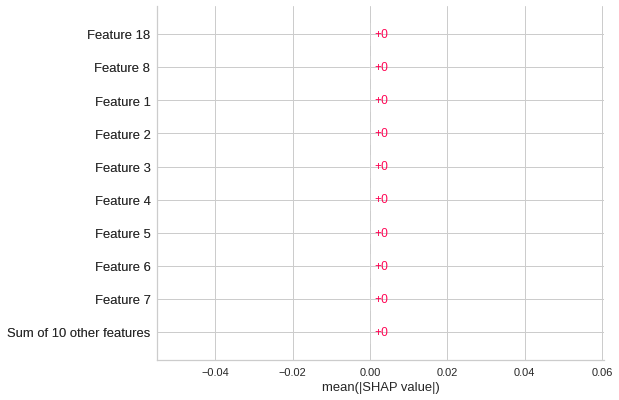

In [ ]:
shap.plots.bar(shap_values)

In [ ]:
from yellowbrick.model_selection import validation_curve

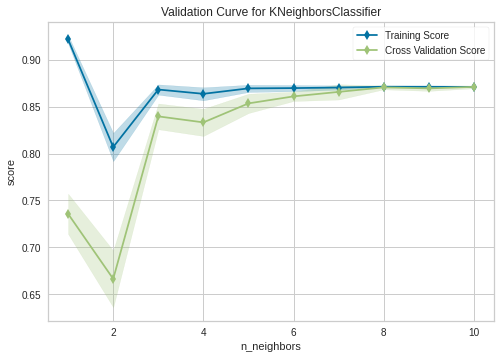

<Figure size 576x396 with 0 Axes>

In [ ]:
viz = validation_curve(KNeighborsClassifier(41), Sxtrain, Sytrain,
                                       param_name = "n_neighbors",
                                       param_range=np.arange(1, 11),
                                        cv = 10, scoring = "accuracy")
#plt.savefig('AUC3.png',bbox_inches='tight')


In [ ]:
from matplotlib import style
class1=['SVM','RandomForestClassifier','Baggingclassifier']
clas1_student=[87.05,90.00,90.08]
class2_student=[88.06,86.57,86.57]
class3_student=[87.09,89.29,89.17]
class4_student=[88.06,86.94,86.94]

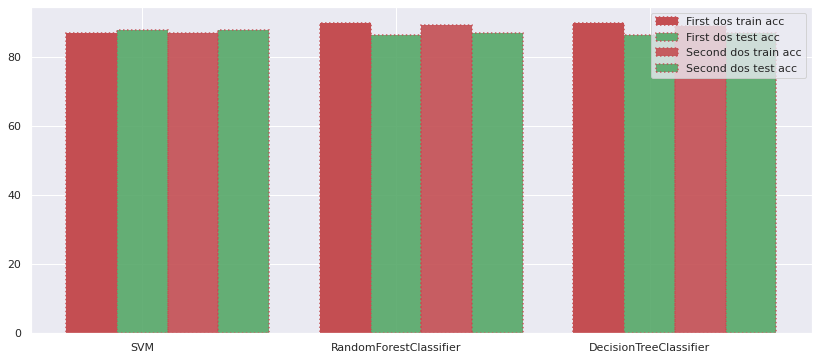

In [ ]:
sns.set()
plt.figure(figsize=(14,6))
class2=np.arange(len(class1))
width=0.2
plt.bar(class2,clas1_student,color='r',width=0.2,edgecolor='r',linewidth=1.5,alpha=1,linestyle=':',label='First dos train acc')
plt.bar(class2+width,class2_student,color='g',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='First dos test acc')
plt.bar(class2+width+width,class3_student,color='r',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='Second dos train acc')
plt.bar(class2+width+width+width,class4_student,color='g',width=0.2,edgecolor='r',linewidth=1.5,alpha=0.9,linestyle=':',label='Second dos test acc')
plt.xticks(class2+width,class1)
plt.legend()
plt.savefig('allaccuracy1.png')

### XGboots

In [ ]:
import xgboost
model = xgboost.XGBClassifier().fit(fxtrain, fytrain)

In [ ]:
model.score(fxtest,fytest)

0.8805970149253731

In [ ]:
explainer = shap.Explainer(model, fxtest)
shap_values = explainer(fxtest)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import tools

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification, make_blobs, make_checkerboard
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier)
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [ ]:
Y = data['Name of vaccine']

Y

1             Vero Cell
2             Vero Cell
3             Vero Cell
4             Vero Cell
5             Vero Cell
             ...       
3739          Vero Cell
3740    Pfizer-BioNTech
3741          Vero Cell
3758            Sinovac
3759    Pfizer-BioNTech
Name: Name of vaccine, Length: 2677, dtype: object

In [ ]:
nu_svc  = svm.NuSVC(kernel='linear')

NameError: ignored

In [ ]:
import numpy as np
import pylab as pl
import sklearn.svm as svm
# import some data to play with
X =df2.iloc[:, :2] # we only take the first two features. We could
                     # avoid this ugly slicing by using a two-dim dataset

h=.02 # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
svc     = svm.SVC(kernel='linear').fit(X, Y)
rbf_svc = svm.SVC(kernel='poly').fit(X, Y)
nu_svc  = svm.NuSVC(kernel='linear')
lin_svc = svm.LinearSVC().fit(X, Y)
nu_svc.fit(X,Y)

# create a mesh to plot in
x_min, x_max = X[:,0].min()-1, X[:,0].max()+1
y_min, y_max = X[:,1].min()-1, X[:,1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with polynomial (degree 3) kernel',
          'NuSVC with linear kernel',
          'LinearSVC (linear kernel)']


pl.set_cmap(pl.cm.Paired)

for i, clf in enumerate((svc, rbf_svc, nu_svc, lin_svc)):
    # Plot the decision boundary. For that, we will asign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    pl.subplot(2, 2, i+1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    pl.set_cmap(pl.cm.Paired)
    pl.contourf(xx, yy, Z)
    pl.axis('tight')

    # Plot also the training points
    pl.scatter(X[:,0], X[:,1], c=Y)

    pl.title(titles[i])

pl.axis('tight')
pl.show()

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



ValueError: ignored

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(fxtrain, fytrain)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [ ]:
final_model = svm_model.best_estimator_
Y_pred = final_model.predict(fxtest)

In [ ]:
print(confusion_matrix(fytest,Y_pred))
print("\n")
print(classification_report(fytest,Y_pred))

print("Training set score for SVM: %f" % final_model.score(fxtrain , fytrain))
print("Testing  set score for SVM: %f" % final_model.score(fxtest , fytest ))
_
svm_model.score

[[  0   0   0  20]
 [  0   0   0   5]
 [  0   0   0   7]
 [  0   0   0 236]]


                 precision    recall  f1-score   support

        Moderna       0.00      0.00      0.00        20
Pfizer-BioNTech       0.00      0.00      0.00         5
        Sinovac       0.00      0.00      0.00         7
      Vero Cell       0.88      1.00      0.94       236

       accuracy                           0.88       268
      macro avg       0.22      0.25      0.23       268
   weighted avg       0.78      0.88      0.82       268

Training set score for SVM: 0.870486
Testing  set score for SVM: 0.880597


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<bound method BaseSearchCV.score of GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])>

In [ ]:
import warnings


def versiontuple(v):
    return tuple(map(int, (v.split("."))))


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

In [ ]:
plot_decision_regions(fxtest, fytest, svm_model)

TypeError: ignored